# Analysis of Factors Impacting Health Insurance Charges Project
### Waree Protprommart
### CSCI E-83
### Professor Elston

## <u>Executive Summary</u>
This report aims to analyze the factors influencing health insurance charges, including age, sex, Body Mass Index (BMI), number of dependents, smoking status, and U.S. geographic region, through the statistical models of Ordinary Least Squares (OLS), Robust Regression, Gamma Generalized Linear Models (GLMs), and Tweedie GLMs. Box-Cox and log transformations are applied to stabilize the response variable, which is insurance charges. The factors influencing health insurance are evaluated by positive or negative effects on insurance charges, and whether they are significant or non-significant to insurance charges. The result of the analysis shows that smoking, age, BMI, and more number of dependents are significant to the increase in insurance charges with smoking being the most significant predictor. Locating in the Southwest and Southeast significantly decreases the charges compared to those who reside in the Northwest and Northeast. Female insurance charges significantly increased more than males by a small difference. The key takeaway and insights from this study emphasize the potential for individuals to reduce charges by adopting healthier lifestyle choices, such as quitting smoking, maintaining a healthy BMI, and understanding how demographic and regional factors influence their insurance costs. 
  

## <u>Introduction</u>
### Statement of problem
Health care insurance is one of the essential factors for people to receive the treatment they need and maintain their health. However, despite its importance, many Americans find it challenging to afford health insurance due to the rising costs of health care services and insurance premiums. Total health spending in the U.S. has surged at a rate that outpaces inflation, creating financial strain for individuals and families.

Understanding how health insurance companies predict and calculate premium rates is crucial. When individuals gain insight into this process, they can make informed lifestyle choices that may lower their premiums, potentially reducing their overall health costs. This knowledge empowers people to take preventive measures and encourages healthier habits that could contribute to lowering their insurance premiums.

In this analysis, we aim to uncover the relationship between the medical costs billed to health insurance companies and various predictors, including an individual’s age, sex, Body Mass Index (BMI), number of dependents, smoking status, and U.S. geographic region. By examining these factors, we hope to shed light on how certain lifestyle and demographic attributes contribute to health insurance costs.

The primary audience for this analysis includes Americans who either pay for their insurance independently or as heads of households responsible for their families' health coverage. Additionally, this report is intended for health insurance professionals and healthcare workers who deal with health insurance daily and might benefit from deeper insights into the variables affecting premium calculations. Understanding these relationships can support better communication with clients and inform policy adjustments that account for various health risks.


### summary of conclusion

The statistical models used for insurance charges analysis include Ordinary Least Squares (OLS), Robust Regression, Gamma Generalized  Linear Model (GLM), and Tweedie GLMs, with Box-Cox and log transformations applied to charges.

Smoking emerged as the most significant predictor, substantially increasing charges and interacting with BMI, age, and number of children to reveal nuanced relationships. Age and BMI consistently exhibited positive associations with charges, while the number of children also showed a significant positive effect. Regional differences were mixed, with Southeast and Southwest residents experiencing reduced charges compared to the Northeast. Females incurred slightly higher baseline charges than males, potentially due to healthcare costs specific to women, though this difference was relatively small. 

Practical insights emphasize the importance of managing smoking and BMI to lower charges, while regional and gender differences are less impactful. Future work could address residual heteroscedasticity and explore additional variables like income or pre-existing conditions to refine model accuracy. The Box-Cox Gamma GLM provided the most reliable results, with the Box-Cox Tweedie GLM with smoking interaction terms showing promise for reducing residual heteroscedasticity.

## <u>Data Preparation</u>

When we are looking at the explanatory or dependent variables, there are only six of them that can be considered to be on the lower side of the dimension for explanatory variables. However, about 1,338 observations should be sufficient to make a reasonable inference. 

There are no missing values in any of the variables. The variables that are discrete consisted of age, BMI, children, and charges.   


In [67]:
#import libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
import scipy.stats as ss
import seaborn as sns
import math
from patsy import dmatrices
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn.metrics as sklm
from statsmodels.graphics.regressionplots import influence_plot

In [68]:
#read CSV file
insurance = pd.read_csv('insurance.csv', usecols=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])
insurance

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [69]:
#Search for any missing values in each columns
for col in insurance.columns:
    missing = insurance.loc[:,col].isnull().sum()
    print('For {} the number of missing values = {}'.format(col,missing))

For age the number of missing values = 0
For sex the number of missing values = 0
For bmi the number of missing values = 0
For children the number of missing values = 0
For smoker the number of missing values = 0
For region the number of missing values = 0
For charges the number of missing values = 0


First, we will be exploring continuous variables:

In [71]:
#General statistics of the dataset
insurance.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

#### Variables explanation from the dataset
**Age**
Age of primary beneficiary

**Sex**
Insurance contractor gender, female / male

**bmi**
Body mass index, providing an understanding of body, weights that are relatively high or low

**children**
Number of children covered by health insurance / Number of dependents

**smoker**
Smoker / Non - smoker, binomial data

**region**
* The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* categorial data

**charges**
Individual medical costs billed by health insurance.

#### Statistics of Numerics Variables

**Age** has a mean of 39.2 and a standard deviation of 14.049.

**Bmi** has a mean of 30.66 and a standard deviation of 6.088.
Interestingly, According to the CDC adults who have higher than 30 BMI are considered to be obese and the average BMI in this data set is 30. 

The mean of **children** per family is 1.09 with a standard deviation of 1.205. Most people have low or no children in their family, and maximum number of children is 5.

The mean of **insurance charge** is 13,270 with a standard deviation of 12,110.01. There are outliers for higher charges starting at 40,000 up dollars until 60,000 dollars. There is a wide distance from minimum to maximum charges. We will explore more what variables correlate or attribute to this high dispersion of insurance charges. Next, we explore our categorical variables.

## <u>Exploration of Dataset (Exploratory Data Analysis)</u>

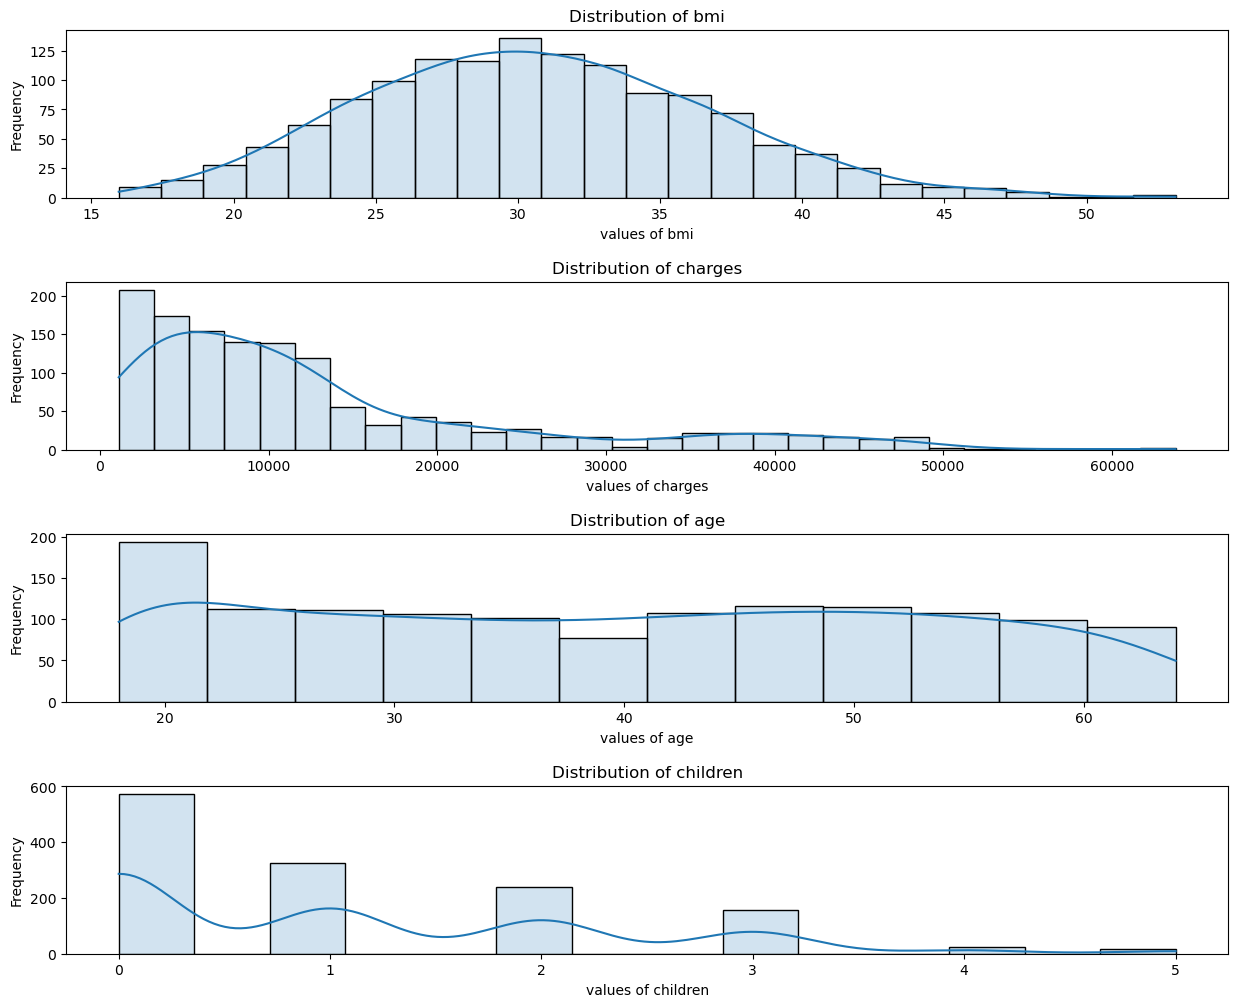

In [74]:
#produce histogram for continuous variabless

def histogram_plt(df, col):
    sns.histplot(x=df.loc[:,col], kde=True, ax=ax[i], alpha=0.2)
    ax[i].set_xlabel('values of ' + col)
    ax[i].set_ylabel('Frequency') 
    ax[i].set_title('Distribution of ' + col) 
    
con_col = ["bmi", "charges", "age", "children"]

#set up the plot
fig,ax = plt.subplots(4,1,figsize=(15,12))

# Adjust spacing
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(con_col):
    histogram_plt(insurance, col)
plt.show()

The histograms above show distributions of continuous and count variables including BMI, charges, age, and children. BMI has a right-skewed bell curve shape. Charges have a long right skewed tail when compared to BMI distribution. Age distribution is uniform for all ages except for the 20 age range, which has the highest frequency. For the distribution of children, as the number of children increases, the frequency decreases. 

In [76]:
#Counting for each category in categorical columns
sex_count = insurance['sex'].value_counts()
sex_count_fq = insurance['sex'].value_counts(normalize=True)
smoker_count = insurance['smoker'].value_counts()
smoker_count_fq = insurance['smoker'].value_counts(normalize=True)
region_count = insurance['region'].value_counts()
region_count_fq = insurance['region'].value_counts(normalize=True)
print(f'The count of female and male sex: {sex_count} \n The percentage of sex is {sex_count_fq}')
print(f'The count of female and male sex: {smoker_count} \n The percentage of sex is {smoker_count_fq}')
print(f'The count of female and male sex: {region_count} \n The percentage of sex is {region_count_fq}')

The count of female and male sex: sex
male      676
female    662
Name: count, dtype: int64 
 The percentage of sex is sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64
The count of female and male sex: smoker
no     1064
yes     274
Name: count, dtype: int64 
 The percentage of sex is smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64
The count of female and male sex: region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 
 The percentage of sex is region
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: proportion, dtype: float64


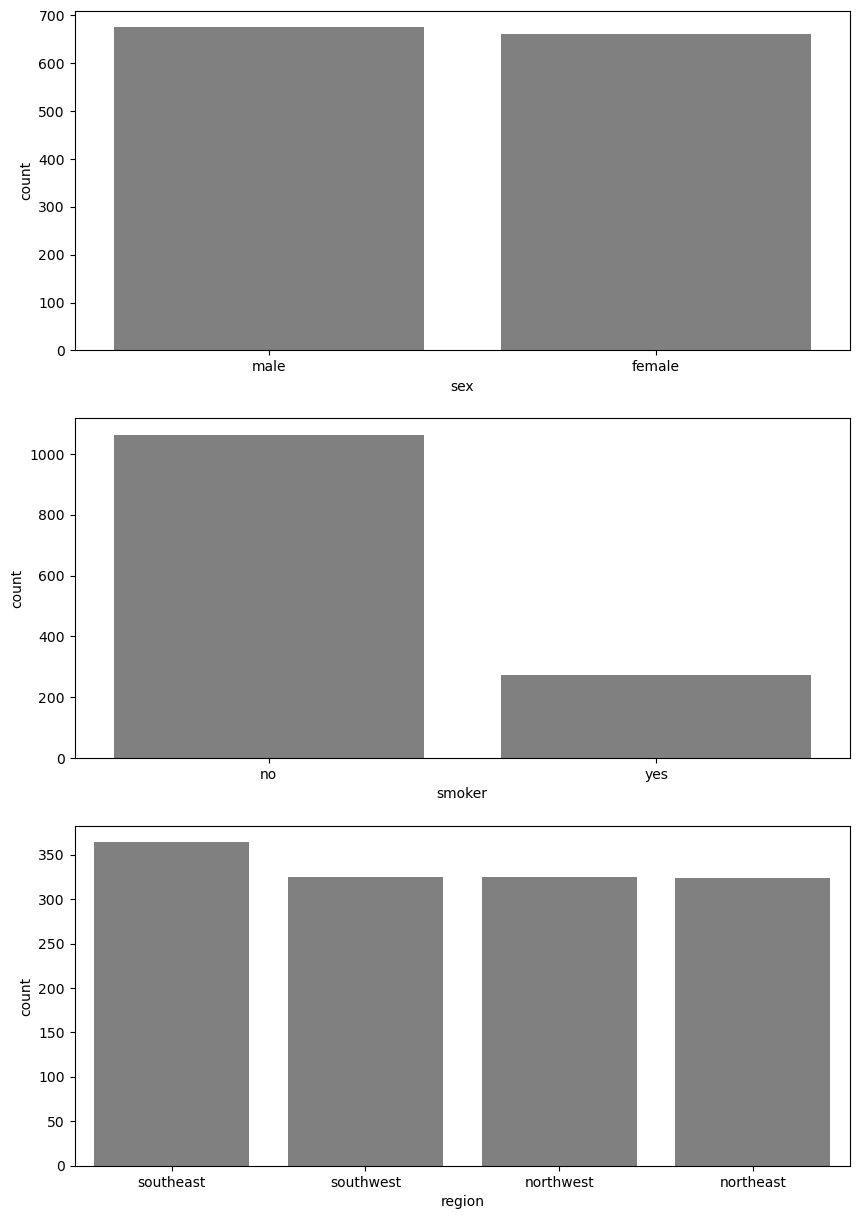

In [77]:
#count plots for categorical variables
cat_col = ['sex','smoker','region']

fig, ax = plt.subplots(3,1,figsize=(10,15))

for i,col in enumerate(cat_col):
    sns.countplot(x=col, facecolor='gray', data=insurance, order=insurance[col].value_counts().index, ax=ax[i]);
    
plt.show()

#### Statistics of Categorical Variables

For **sex** category, males constitute 50% of the dataset, while females constitute almost 50%. The proportion is quite equal between the two sexes.

For **smoker** category, most people are not smokers around 80% and another 20% are smokers.

For **region** located in the U.S., Slightly more people located in the southeast around 27% of the sample in the data. While others live in the southwest, northwest, and northeast each at an equal percentage of around 24%. 

### Difference in Billed Insurance Cost by the Categorical Factors

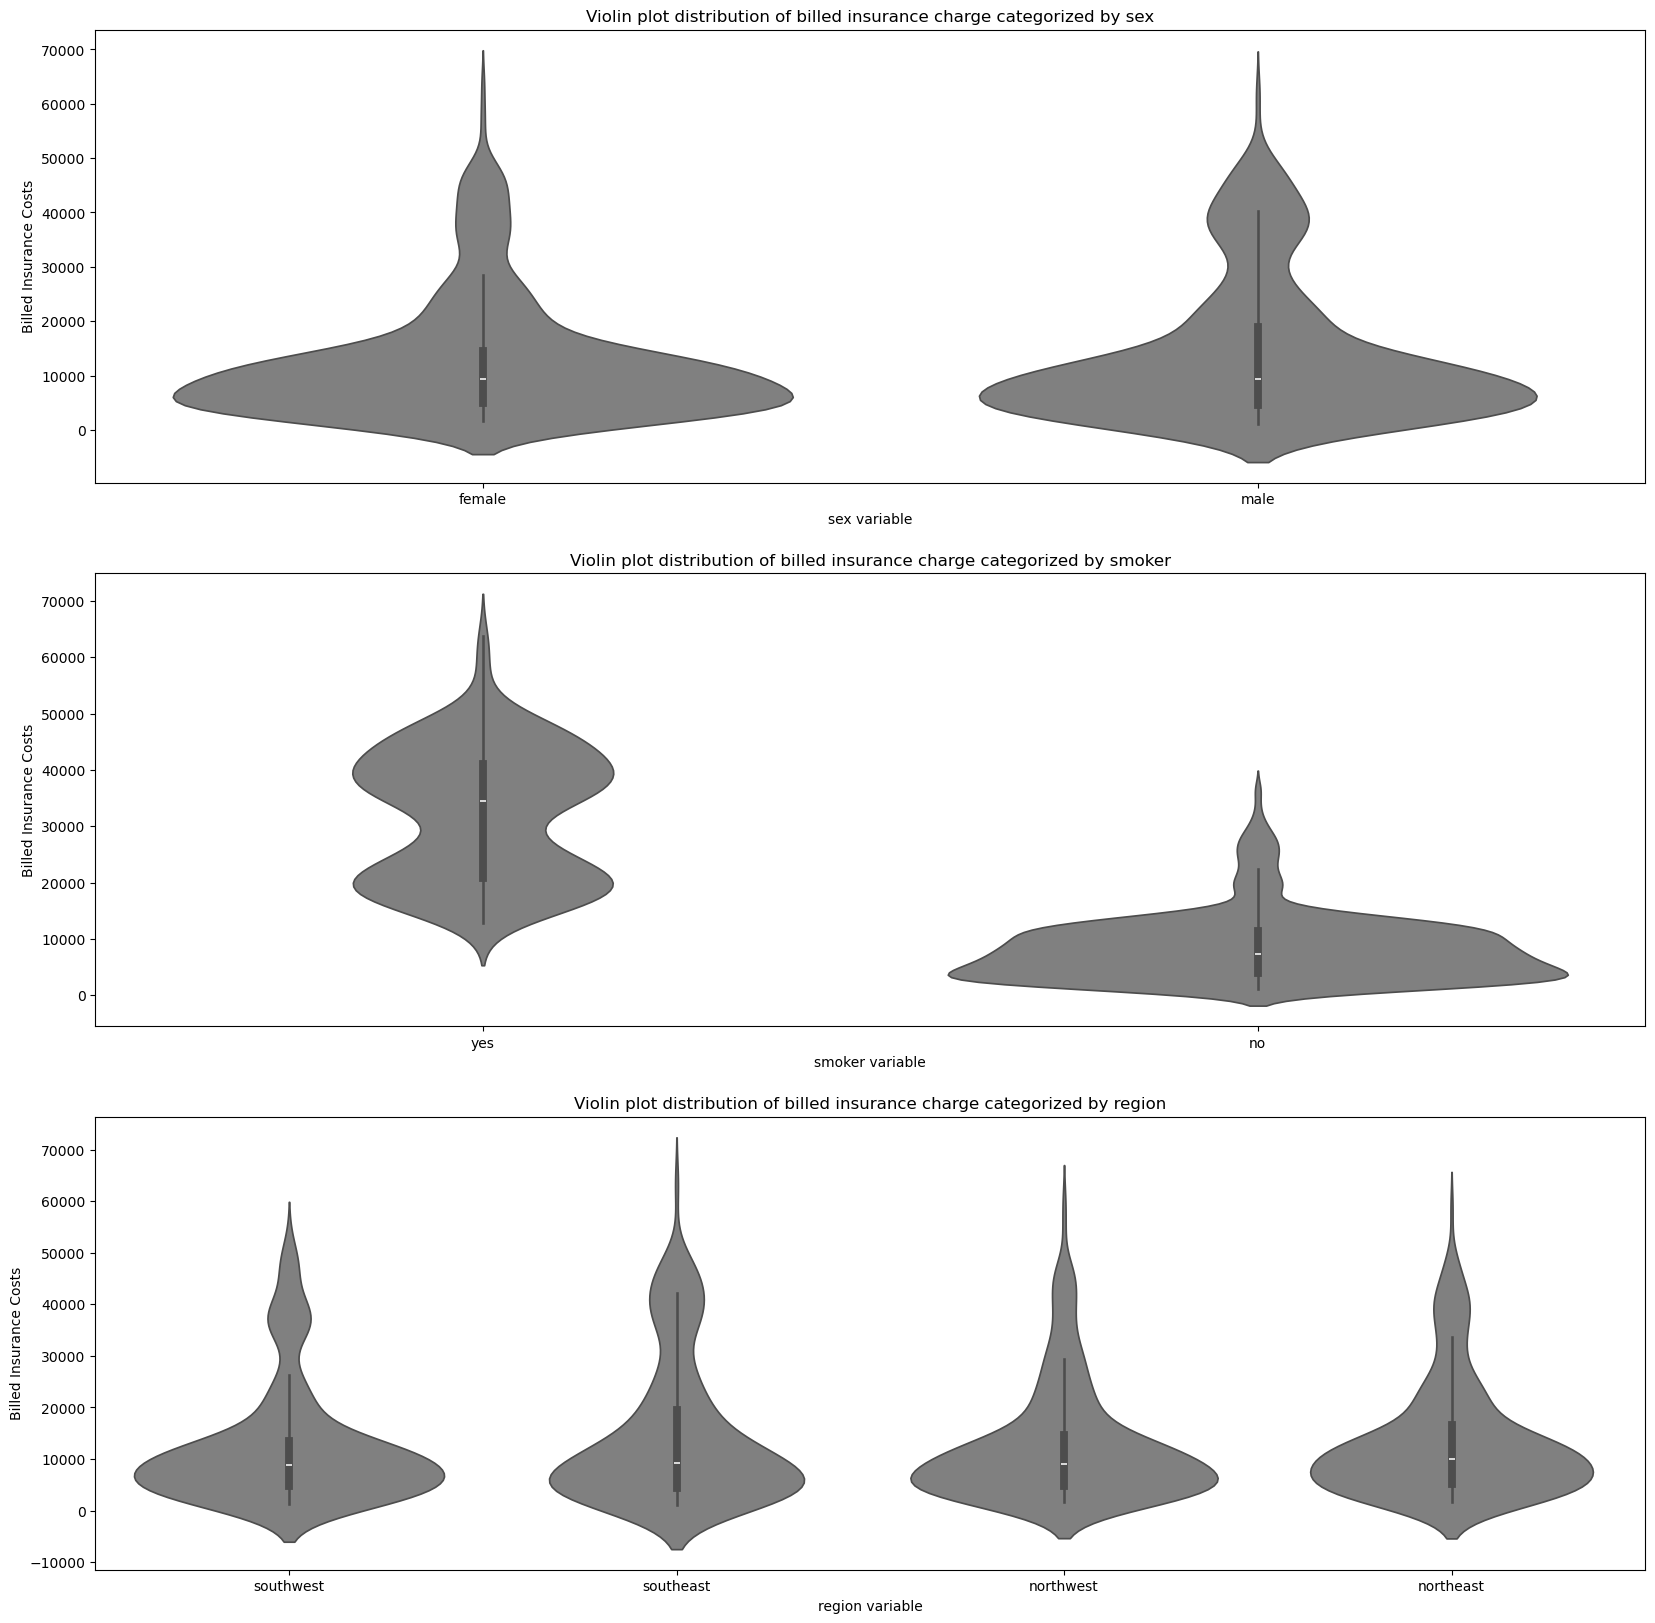

In [80]:
category_variables = ['sex','smoker','region']
#box plot of charges categorized by sex,smoker, and region
fig, ax = plt.subplots(3,1,figsize=(20,20))
for i,col in enumerate(category_variables):
    
    # Plot all variables in one violin plot
    #plt.figure(figsize=(10, 6))
    sns.violinplot(y="charges", x=col, data=insurance, color='gray', ax=ax[i])

    ax[i].set_title(f'Violin plot distribution of billed insurance charge categorized by {col}')
    ax[i].set_xlabel(f'{col} variable')
    ax[i].set_ylabel('Billed Insurance Costs')

plt.show()

The violin plot of billed insurance charge vs. sex shows us that the distribution of insurance charges for males and females appears relatively similar with the majority having lower charges, but the male has a wider interquartile range, wider confidence interval, and slightly more concentration of highly charged individual compared to female. This suggests that gender does not play a major role in the variation of insurance charges.

The violin plot of billed insurance charge vs. smoker category exhibits a distinct difference in the distributions of insurance charges for smokers and non-smokers. Smokers have a median charge higher than nonsmokers, and a wider spread of confidence interval. This suggests that smoking status has a strong impact on insurance charges.

The violin plot of billed insurance charges vs. region displays the distributions of charges across regions. The southeast region has a wider spread of confidence interval and more concentration of people with higher charges when compared to other regions. Southwest, Northwest, and Northeast have more narrow confidence intervals and less concentration of people with higher charges.

#### Trends in Billed Insurance Cost In Numeric Variables by Categories

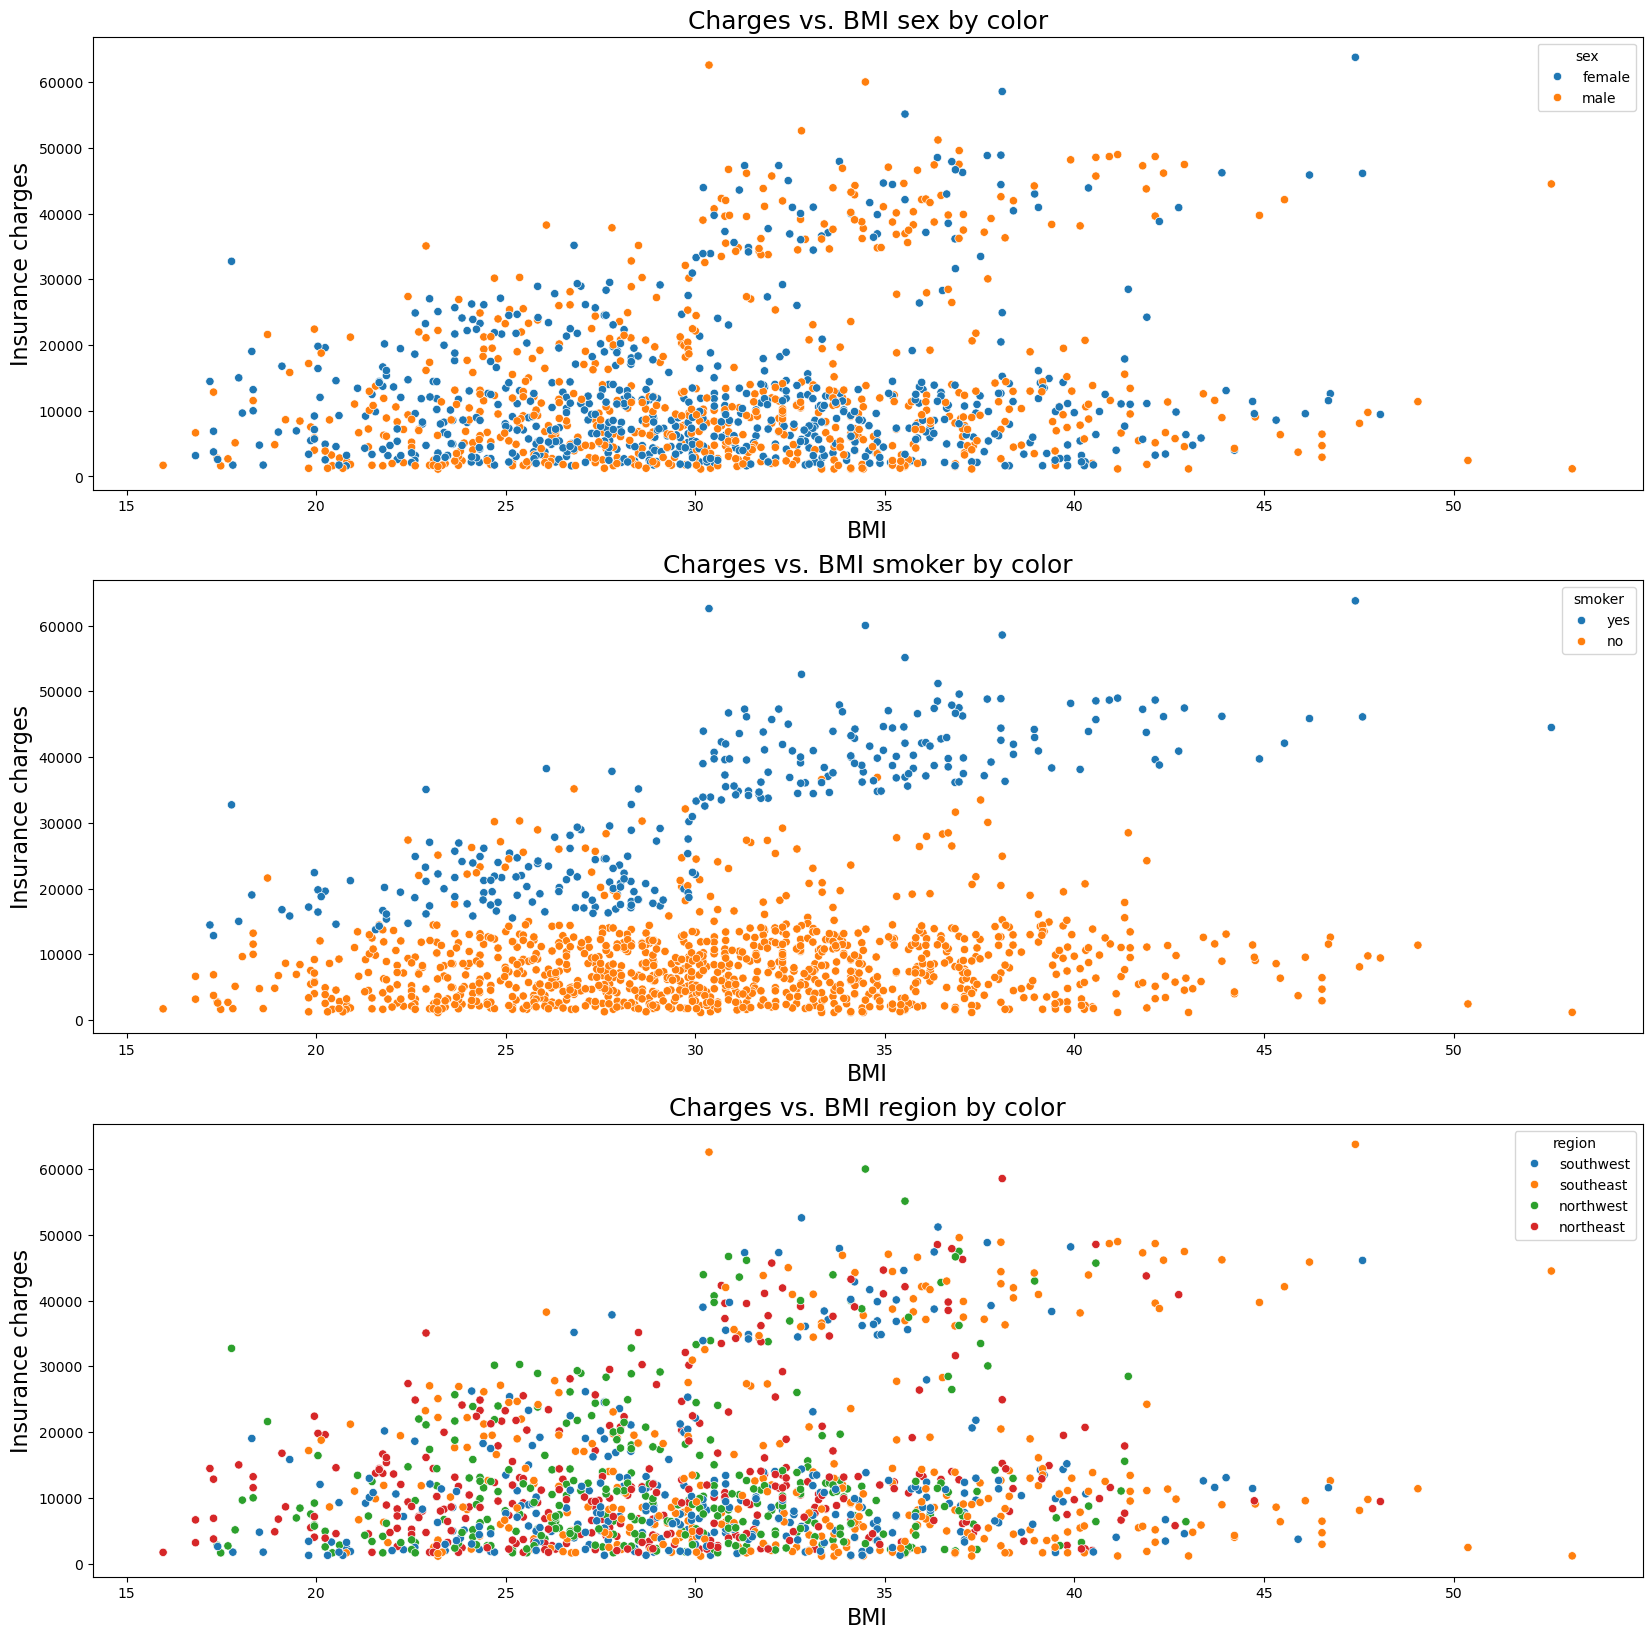

In [83]:
cat_col = ['sex','smoker','region']
con_col = ["bmi", "age", "children"]
#scatter plot of charges categorized by sex, smoker, and region
fig, ax = plt.subplots(3,1,figsize=(20, 20))

for i,col in enumerate(cat_col):
    sns.scatterplot(x = 'bmi', y = 'charges',
                      hue = col,
                      data=insurance,
                      ax=ax[i])
    ax[i].set_title(f'Charges vs. BMI {col} by color', fontsize=18)
    ax[i].set_xlabel('BMI', fontsize=16)
    ax[i].set_ylabel('Insurance charges', fontsize=16) 
plt.show()

Based on the scatter plot BMI versus insurance charges and grouped by categorical value of sex, smoker, and region.
The general relationship between BMI and charges is as the BMI increases, the charges disperse more among people.
When categorized by sex and region, there is no clear category between people who got charged more or less because of a change in BMI. However, when categorized by smoker group, we see a clear upward trend of increase in charges as BMI increases for those who are smokers. While the majority group of nonsmokers has a less clear upward trend of increased charge with BMI. The highest charges of the nonsmoker are not as high as the highest charges of the smoker.

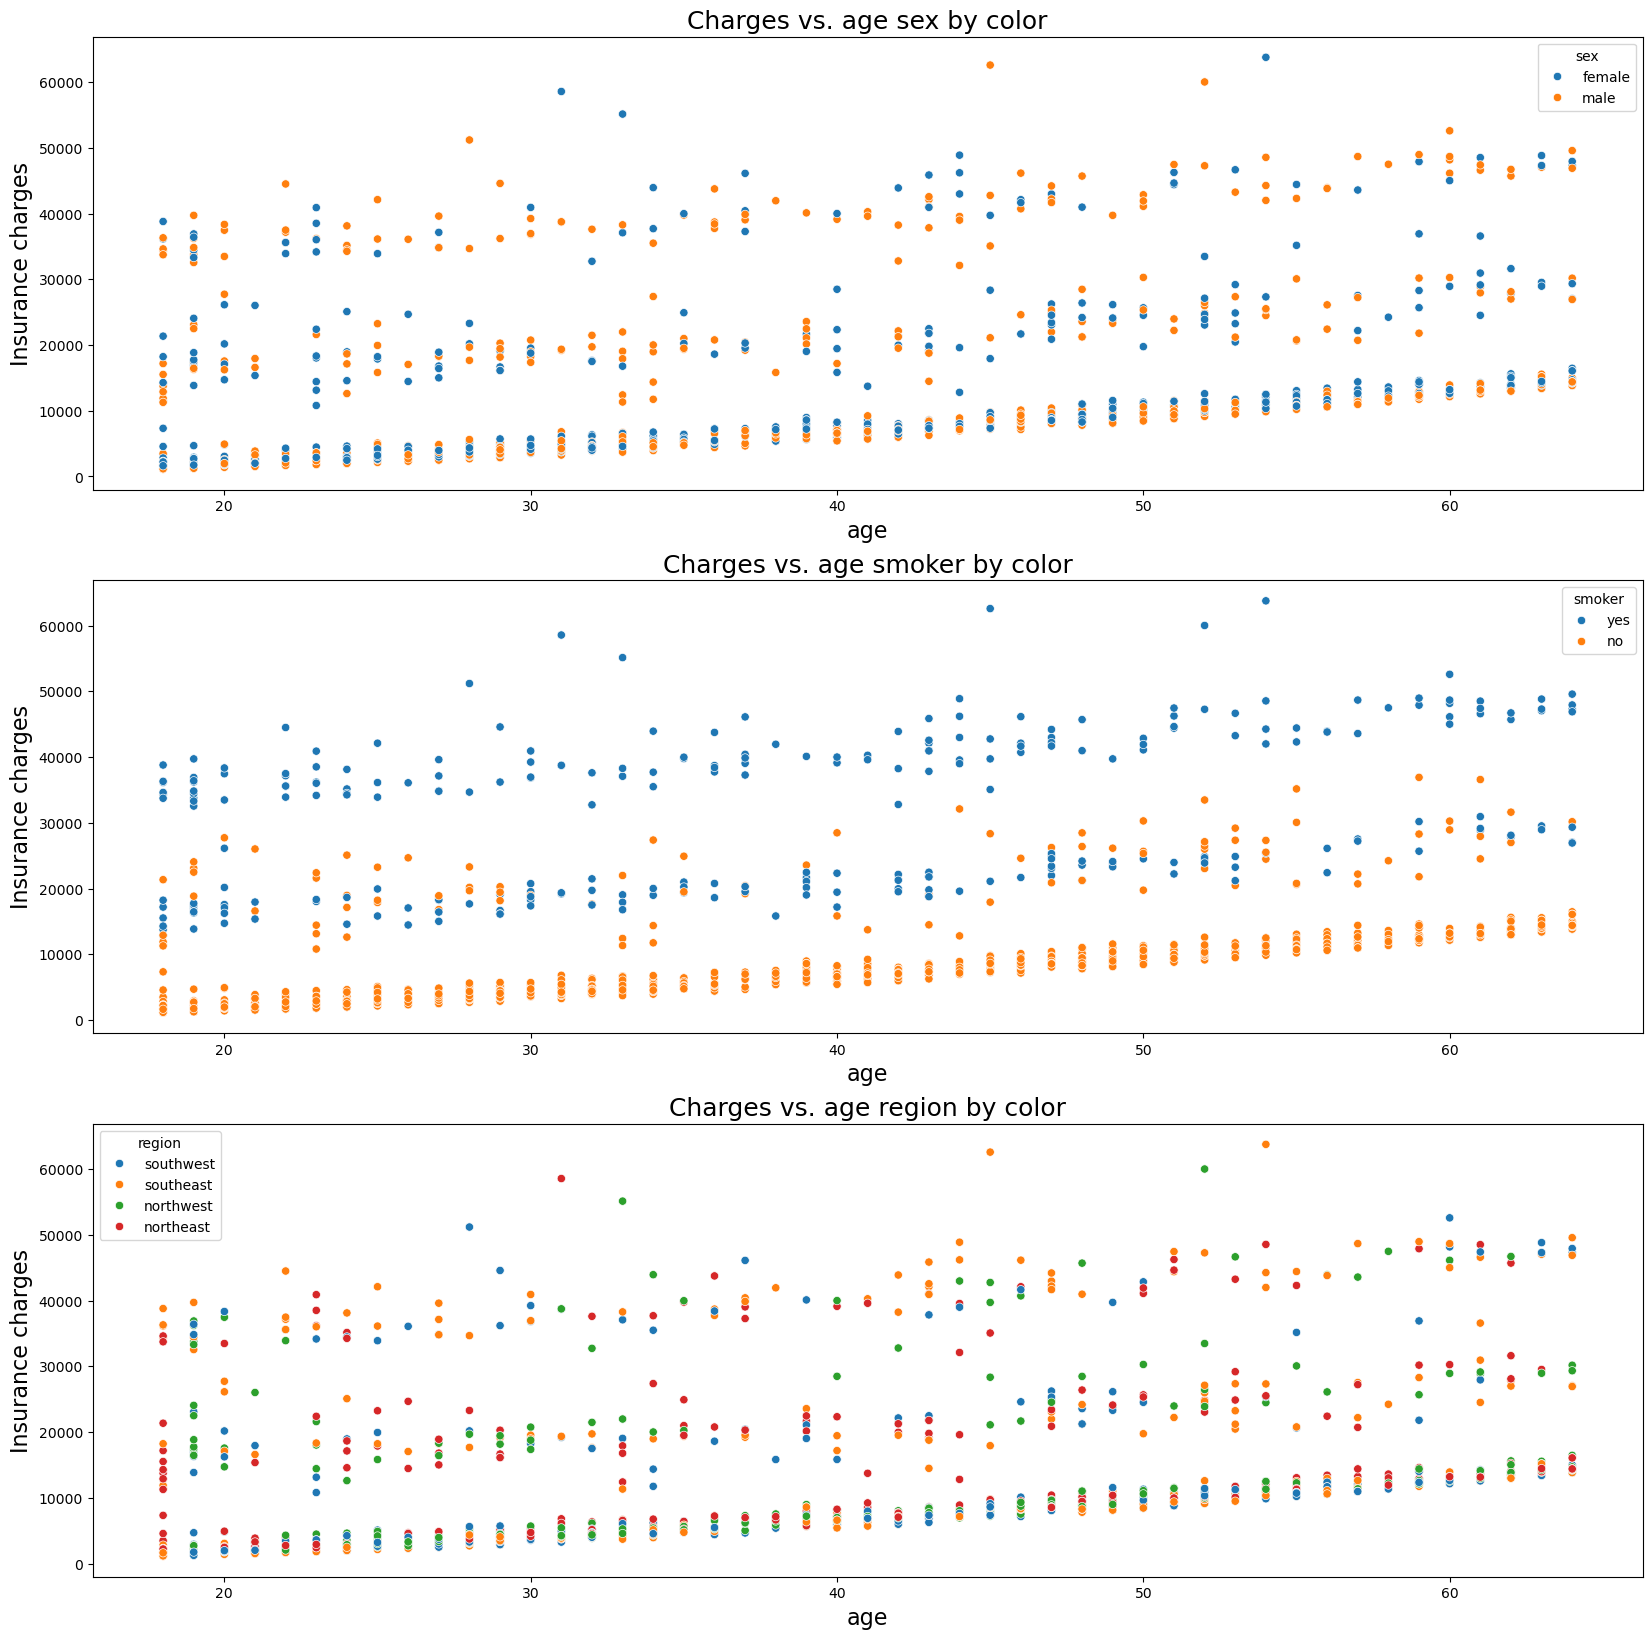

In [85]:
cat_col = ['sex','smoker','region']
con_col = ["bmi", "age", "children"]

fig, ax = plt.subplots(3,1,figsize=(20, 20))

for i,col in enumerate(cat_col):
    sns.scatterplot(x = 'age', y = 'charges',
                      hue = col,
                      data=insurance,
                      ax=ax[i])
    ax[i].set_title(f'Charges vs. age {col} by color', fontsize=18)
    ax[i].set_xlabel('age', fontsize=16)
    ax[i].set_ylabel('Insurance charges', fontsize=16) 
plt.show()

The scatter plot, which shows age versus insurance charges grouped by the categorical value of sex, smoker, and region., revealed that as the BMI increases the charges increase with age. When categorized by sex and region, the baseline of the lowest charge increases, but no category shows a clear distinct trend from the group. This plot shows a similar trend with BMI vs insurance charge that there is a clear distinct trend between smokers and nonsmokers. Those who smoke get charged a lot more than those who are not and the charges increase with age.

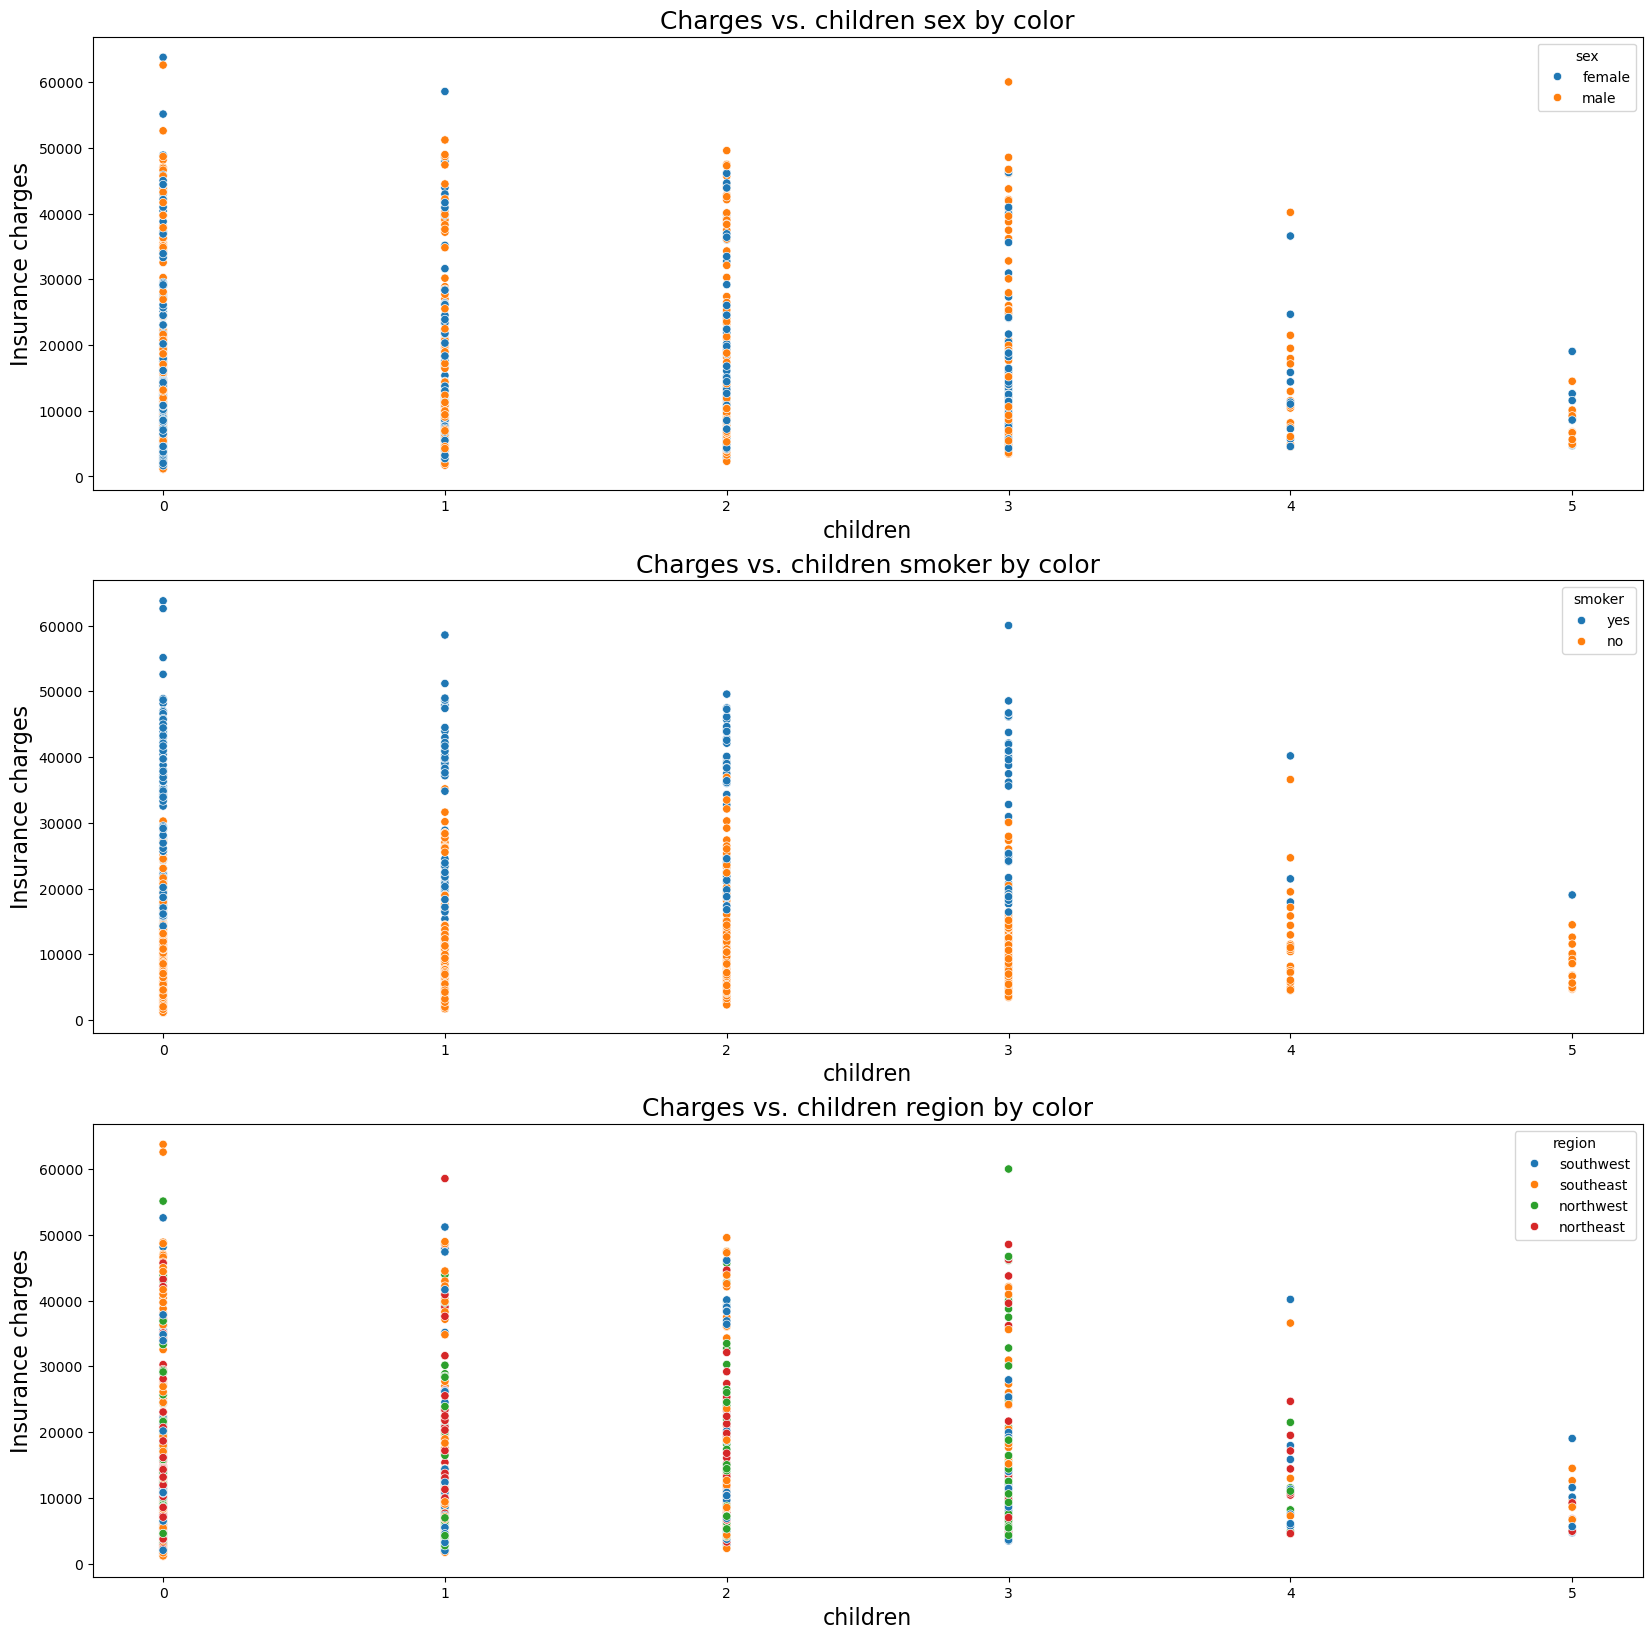

In [87]:
cat_col = ['sex','smoker','region']
con_col = ["bmi", "age", "children"]

fig, ax = plt.subplots(3,1,figsize=(20, 20))

for i,col in enumerate(cat_col):
    sns.scatterplot(x = 'children', y = 'charges',
                      hue = col,
                      data=insurance,
                      ax=ax[i])
    ax[i].set_title(f'Charges vs. children {col} by color', fontsize=18)
    ax[i].set_xlabel('children', fontsize=16)
    ax[i].set_ylabel('Insurance charges', fontsize=16) 
plt.show()

This scatter plot displays the number of children versus insurance charges grouped by the categorical value of sex, smoker, and region. The relationship between children and charges is as the number of children increases, there are less diverse insurance charges range at a lower rate. This might be because fewer people have a lot of children and most people who have children are not smokers based on what we see in the scatter plot when categorized by smoker. Consistent with the other two scatter plots the smoker group gets charged at a higher rate compared to those who do not smoke. There are no clear trends when categorized by sex and region. 

#### A Closer look of trends with facetgrid

In [89]:
#a new row categorizing people into their age groups
age_range = []
for row in insurance.itertuples():
    if row.age < 20:
        age_range.append('less than 20')
    elif 20 < row.age < 30: 
        age_range.append('20s')
    elif 30 <= row.age < 40: 
        age_range.append('30s')
    elif 40 <= row.age < 50:
        age_range.append('40s')
    elif 50 <= row.age < 60:
        age_range.append('50s')
    elif 60 <= row.age < 70:
        age_range.append('60s')
    else:
        age_range.append('more than 60s')

In [90]:
insurance['age_range'] = age_range

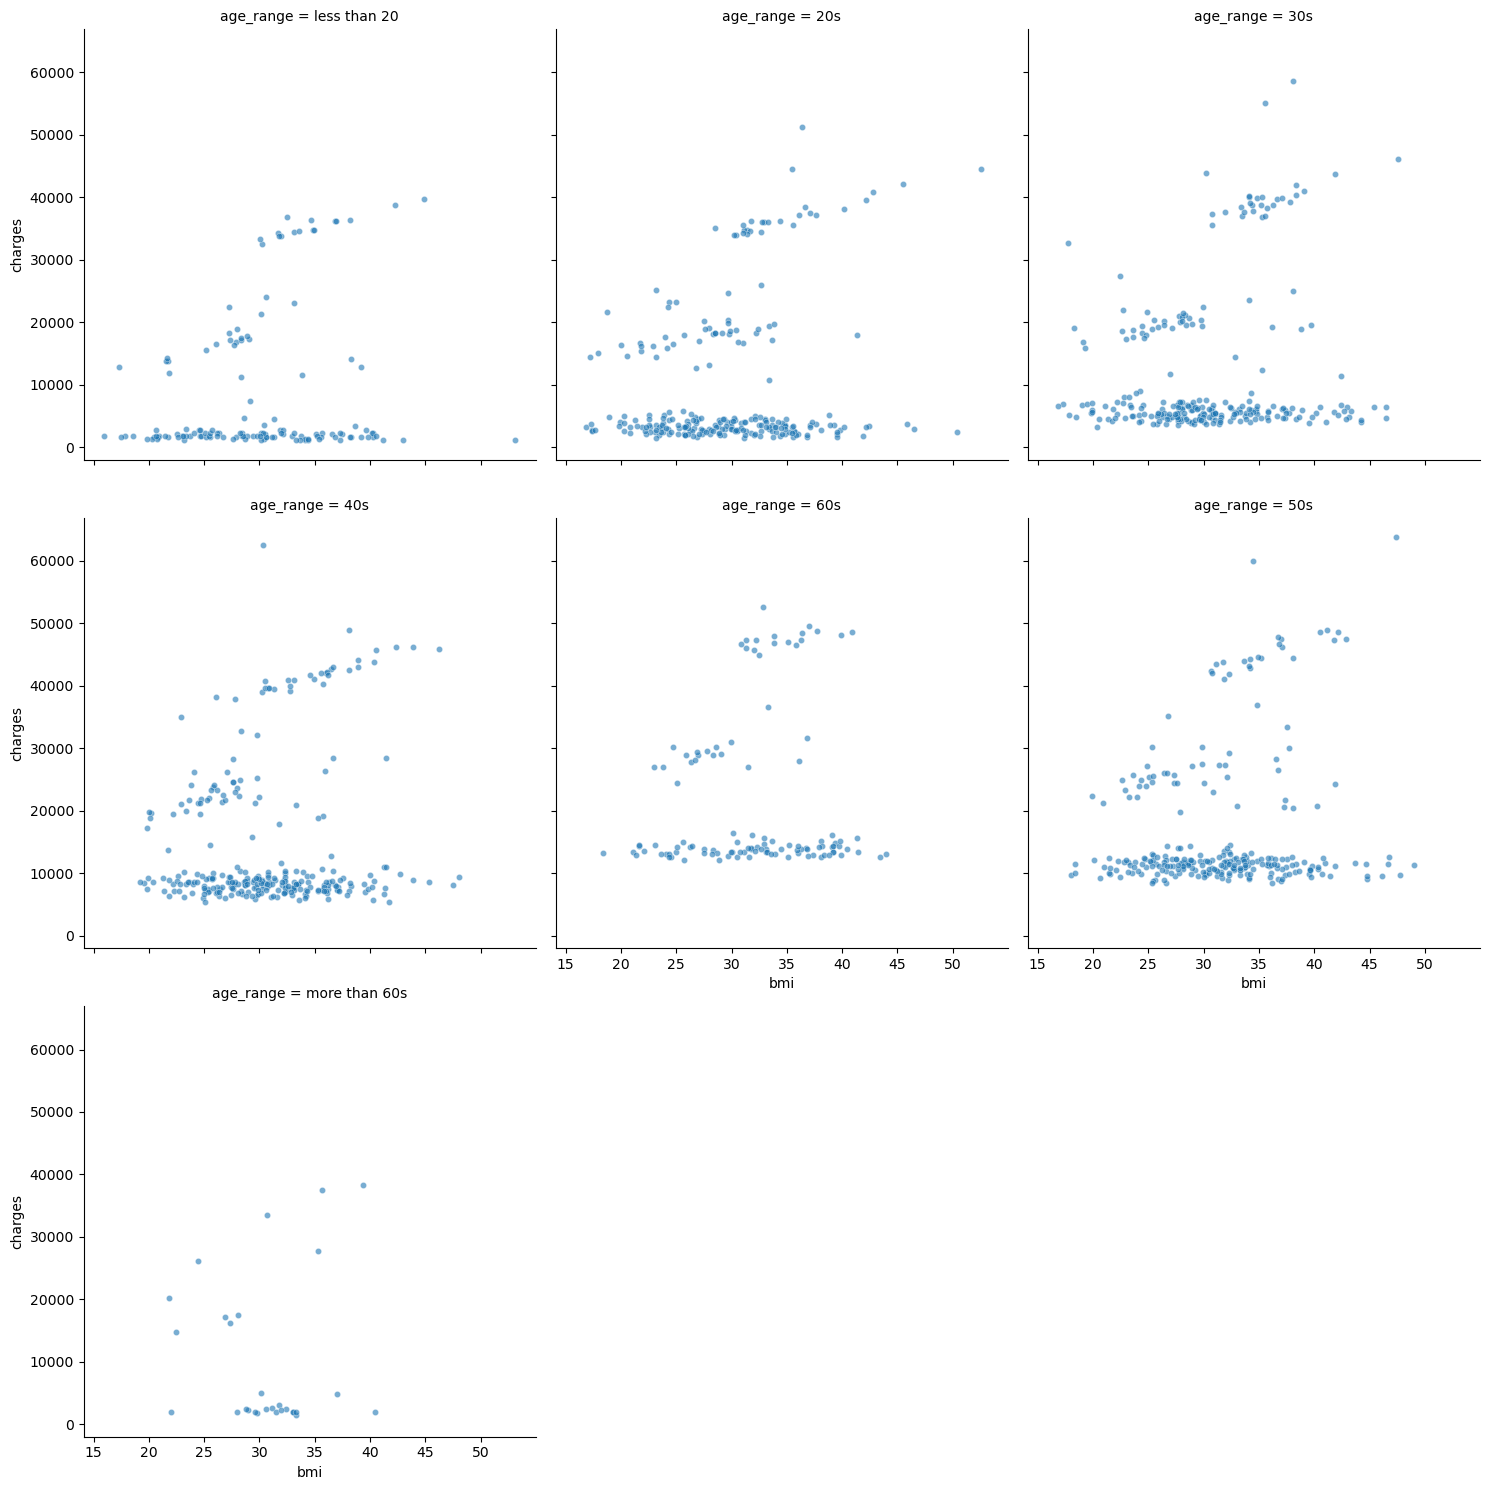

In [91]:
#facet grid plot of charges vs BMI for each age range
g = sns.FacetGrid(insurance, col='age_range', col_wrap=3, height=5)
g = g.map(sns.scatterplot, "bmi", "charges", s=20, alpha=0.6)
plt.show()

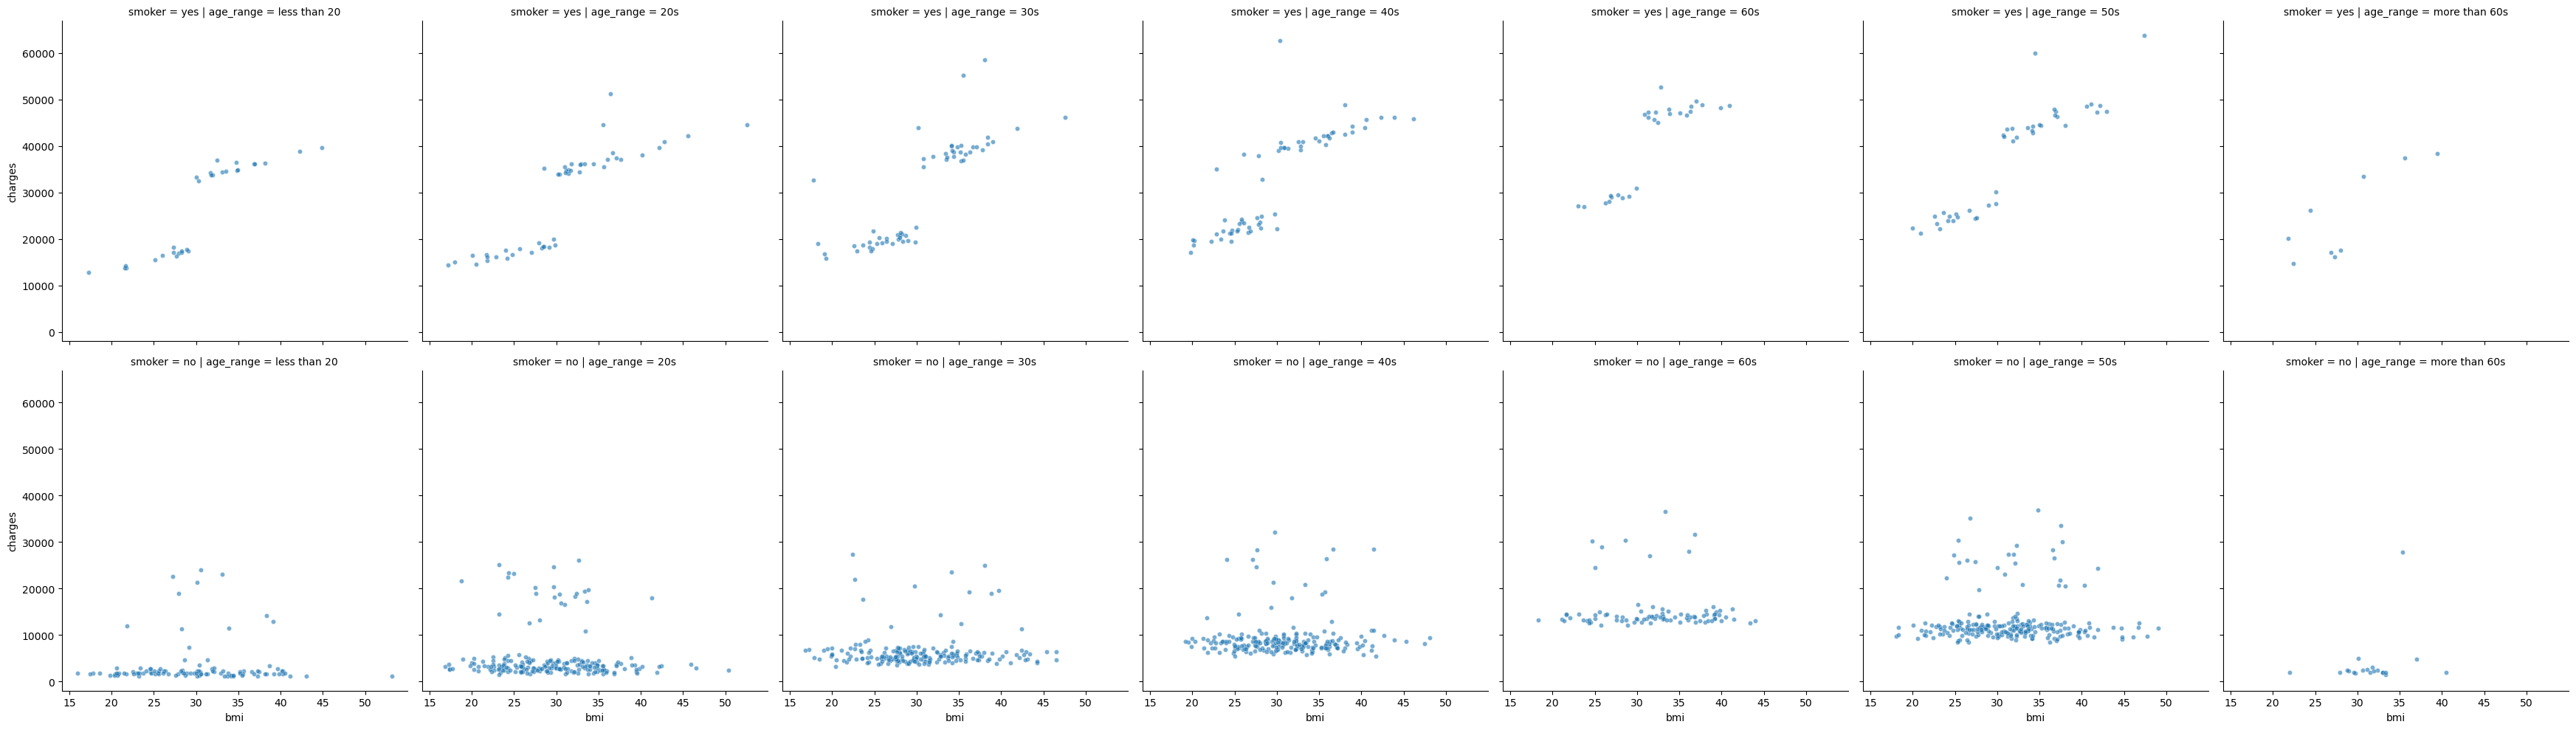

In [92]:
#facet grid plot of charges vs BMI for each age range and smoking category
g = sns.FacetGrid(insurance, col='age_range', row='smoker', height=5)
g = g.map(sns.scatterplot, "bmi", "charges", s=20, alpha=0.6)
plt.show()

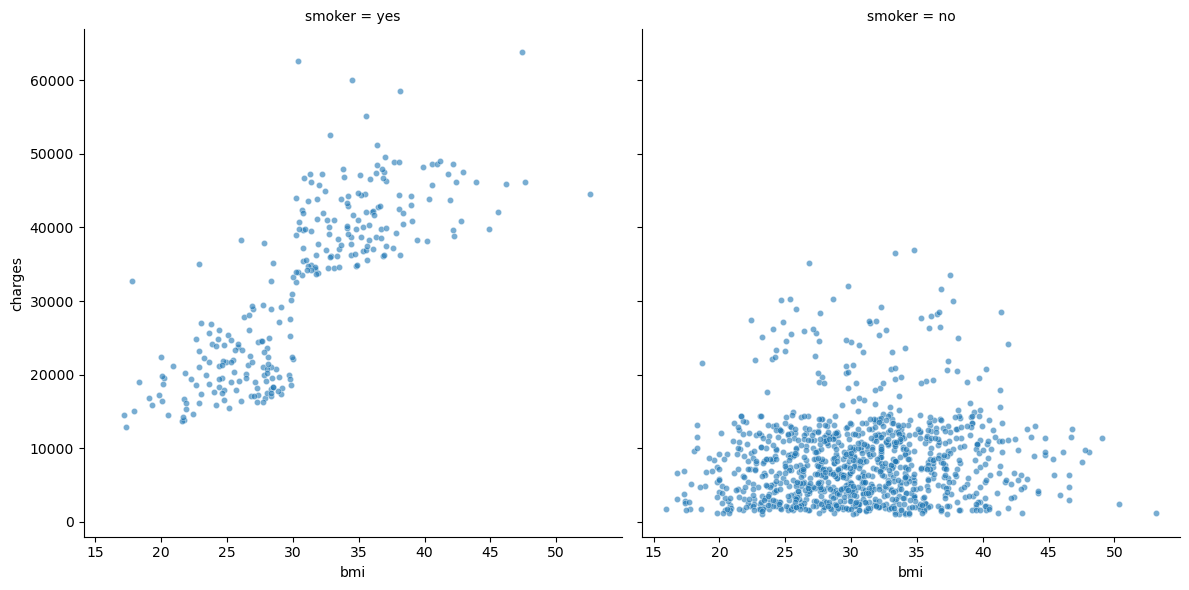

In [93]:
#facet grid plot of charges vs BMI for smoking category
g = sns.FacetGrid(insurance, col='smoker', col_wrap = 2, height=6)
g = g.map(sns.scatterplot, "bmi", "charges", s=20, alpha=0.6)
plt.show()

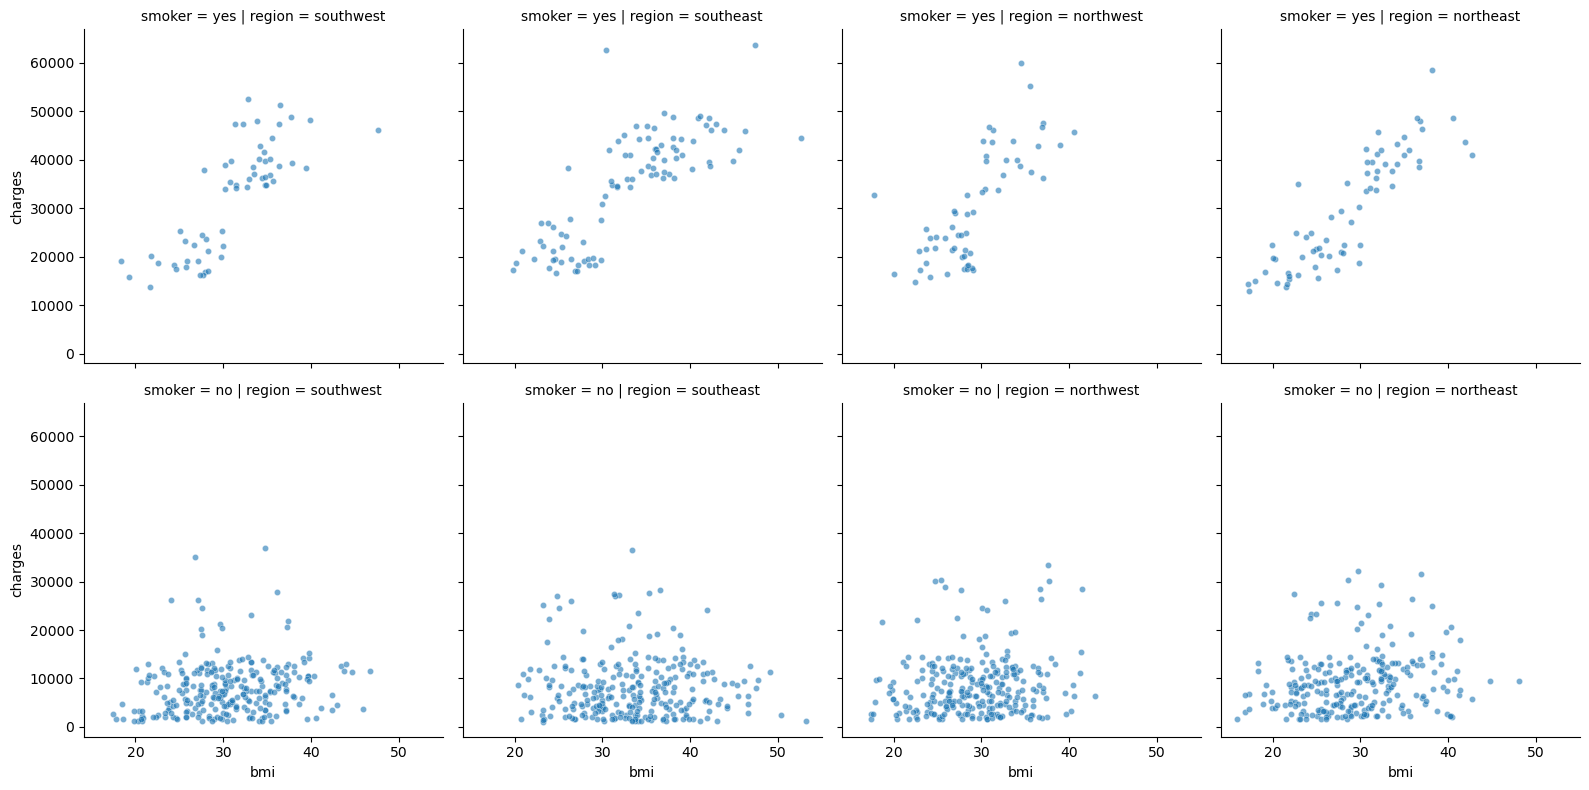

In [94]:
#facet grid plot of charges vs BMI for each regions and smoking category
g = sns.FacetGrid(insurance, col='region', row='smoker', height=4)
g = g.map(sns.scatterplot, "bmi", "charges", s=20, alpha=0.6)
plt.show()

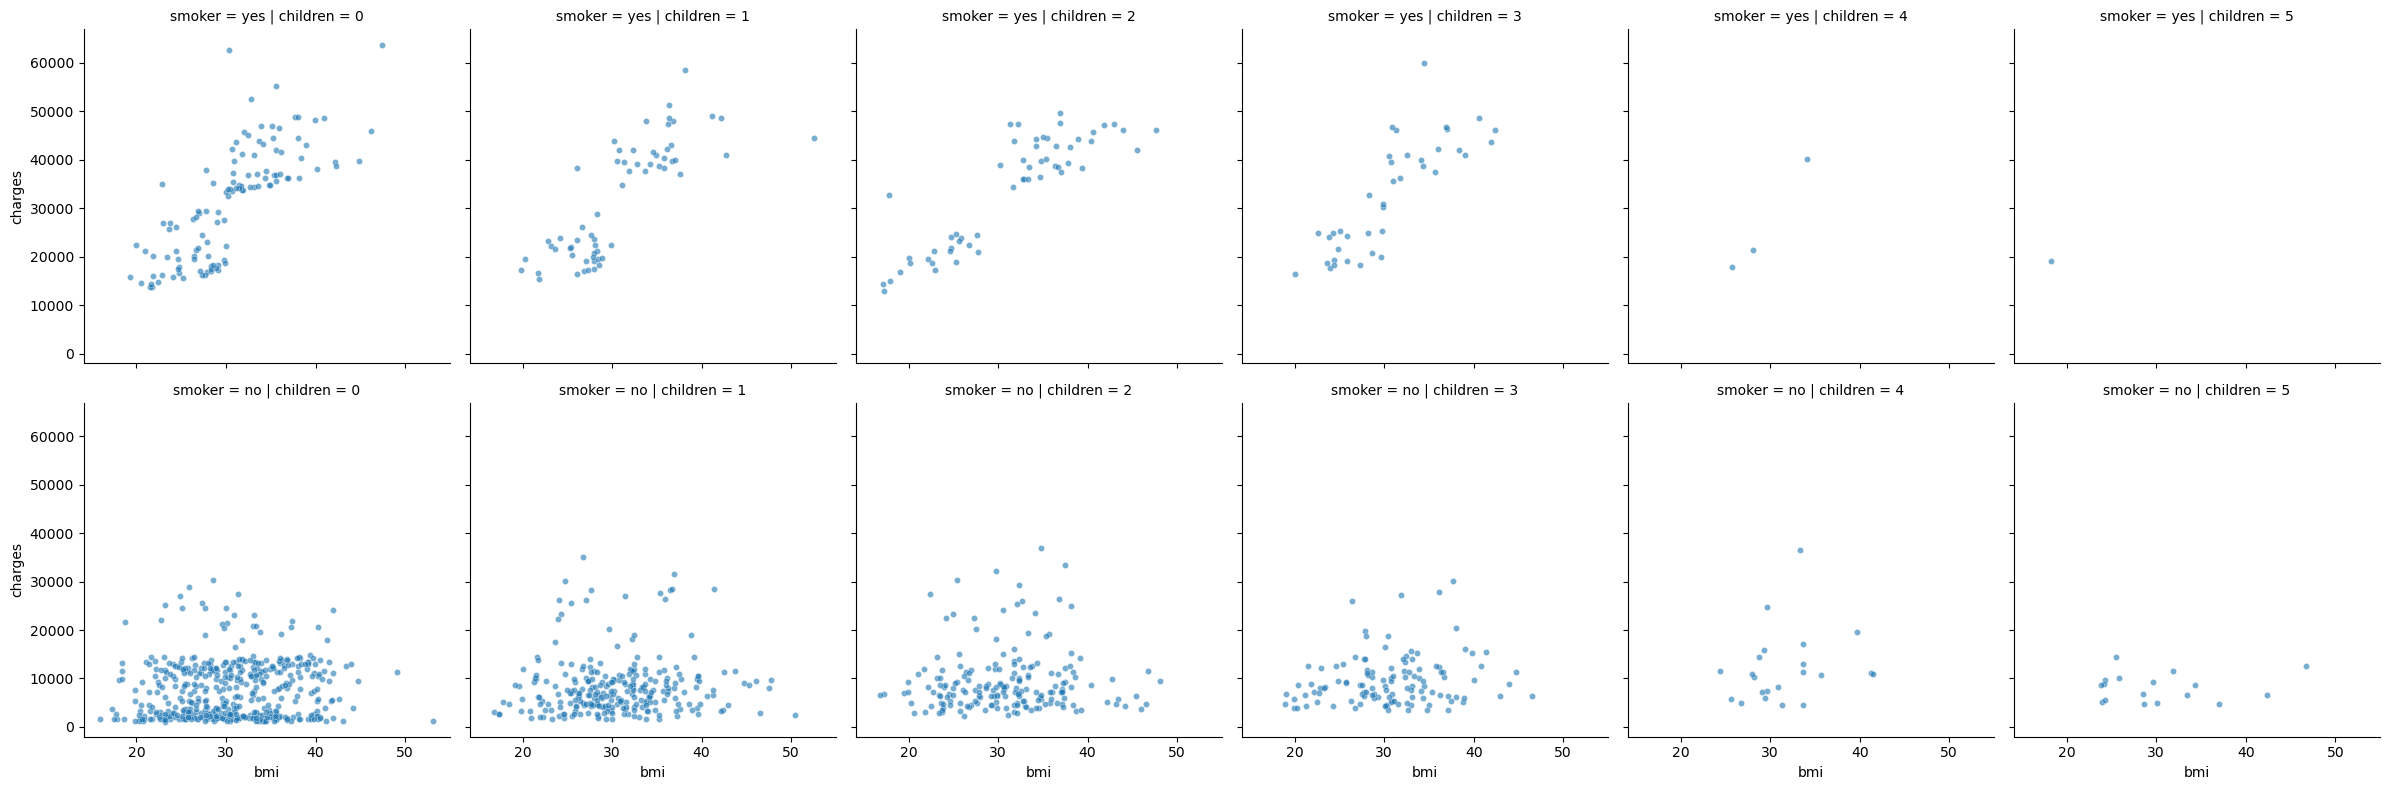

In [95]:
#facet grid plot of charges vs BMI for number of children and smoking category
g = sns.FacetGrid(insurance, col='children', row='smoker', height=4)
g = g.map(sns.scatterplot, "bmi", "charges", s=20, alpha=0.6)
plt.show()

In the scatterplot charges vs bmi separated by age range, we can see the general trend that we can see before which is as bmi increases, the charges increase. Age range plays a factor in this by the lowest baseline charges increase with each increase age range. In the more than 60s-year-old range, there are not a lot of data points to show if the baseline increases or decreases. When we add another separation layer of smoker or non-smoker to the charges vs BMI separated by age range plot, we clearly see that the smoker group has higher charges and a strong positive correlation between BMI and charges while the nonsmoker group charges hover around baseline charges for every age range. Not only in the age range groups that smokers exhibit higher charges and strong correlations, but it also applies when segregated by region and children. Smokers made up almost all of the proportion of the extremely higher charges in every categorical group with the exception of high number of children category (since there are not enough data points for those groups). Next, we will observe the correlation between the variables to see the potential for any multicollinearity.

#### Potential Multicollinearity

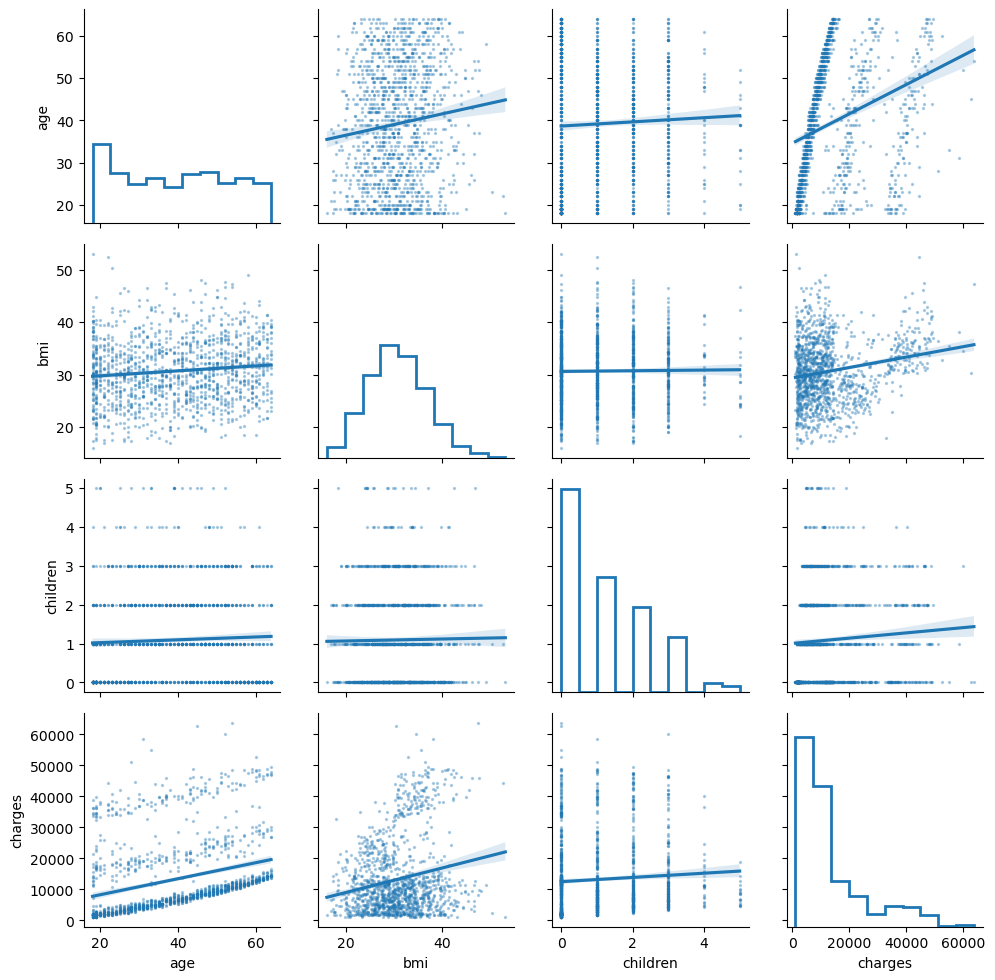

In [98]:
#PairGrid
g = sns.PairGrid(insurance)
g.map_upper(sns.regplot, order=1, truncate=True, scatter_kws={'alpha':0.3, 's':2})
g.map_lower(sns.regplot, order=1, truncate=True, scatter_kws={'alpha':0.3, 's':2})
g.map_diag(plt.hist, histtype="step",linewidth=2)
plt.show()

The Pairgrid plot shows the correlations between the numerical variables and distributions of the variable in the middle. Age has a positive correlation with BMI and charges, but has a low positive to no correlation to children. BMI has a positive correlation with age and charges, and a low positive to no correlation with children. Charges have a positive correlation to age, BMI, and children. The pair grid plot is only showing the correlation slope and no quantification of the correlation. We can use the heatmap to quantify the correlation effect between all the variables.     

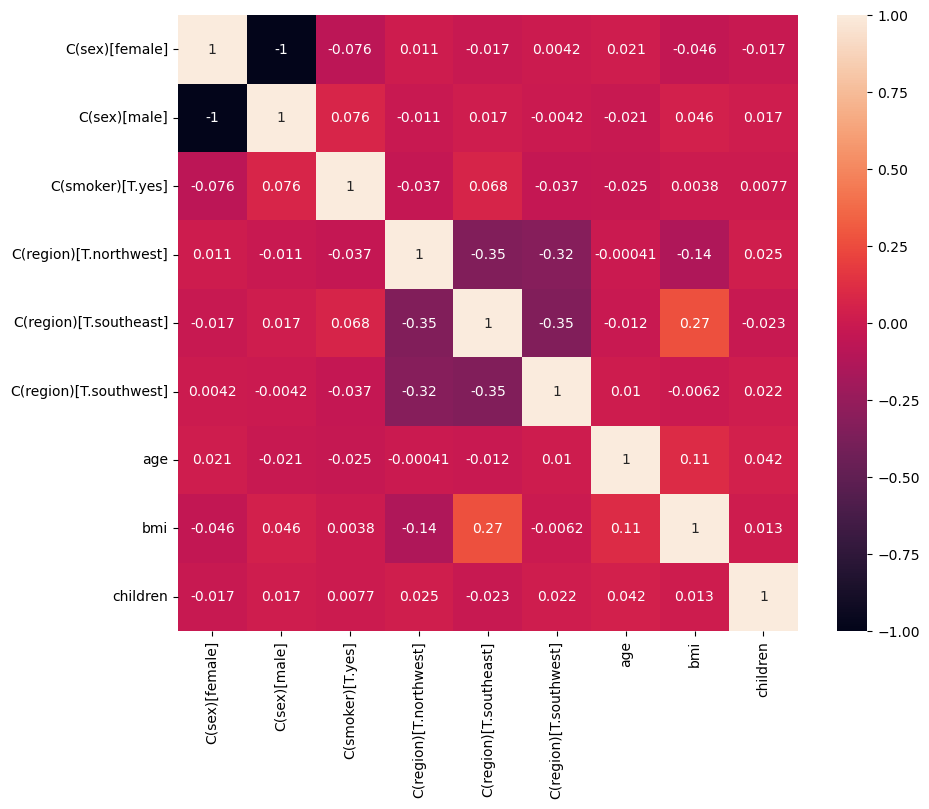

In [100]:
## Define model formula with no intercept - column of all 1s with 0 variance 
formula = 'charges ~ -1 + age + C(sex) + C(smoker) + C(region) + bmi + children'

## Compute correlation matrix 
y, design_matrix = dmatrices(formula, data=insurance)
corr_mat = np.corrcoef(np.transpose(design_matrix))

## Display correlation matrix  
c_names = list(design_matrix.design_info.column_name_indexes)
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_mat, xticklabels=c_names, yticklabels=c_names, ax=ax, annot=True);

According to the heatmap correlation numbers, overall there are no strong positive or negative correlations between the variables. No variable correlations are more than plus or minus 0.5. Some interesting things to be pointed out are there are weak negative correlation between southeast and northwest, southwest and northwest, and southeast and southwest insurance charges. There is a weak positive correlation between the BMI and southeast insurance charge and a weak negative correlation between the BMI and northwest insurance charge. As stated, these correlations are not strong and probably are not significant.

### <u>Analysis Method Using Models</u>

### Choice of Models

The intention for the analysis method of this insurance dataset is to use various models including **Ordinary Least Squares (OLS)** , **Robust linear Regression**, and **GLM (general linear model)**. Then we will see if the assumptions of these models are violated, evaluate the significance of the models as well as the explanatory power of the models, and make inferences based on these models.

The reason why we first use OLS is as a baseline model to investigate simple linear regression relationships between all the factors and how they are related to charges. Because this dataset includes a lot of high-influence data points and outliers for charges, we are going to use Robust linear regression to see if there are any improvements for outliers and residuals. Lastly, we will be fitting data to Gamma and Tweedie GLM. According to our exploratory data analysis of the charges' distribution, we see that the distribution is highly right-skewed. This distribution pattern can either use gamma or poison, and we can further find out what is the best to use by finding the Tweedie power. 

The summary of models and transformation on independent variables are as following table:
| Models   | Dependent variables transformation |
| -------- | ------- |
|Ordinary Least Squares|Box-Cox|
|Robust linear Regression|Log|
|Gamma GLM|
|Tweedie distribution GLM|

### Transform the Response or Independent variable

### Box-cox transform dependent variable Charges

We are going to make a distribution of charge variable closer to normal by Box-Cox transformation. Thus, the residuals of the model should also be closer to normally distributed. The Box-Cox algorithm works by 

$$
x^{(\lambda)}_i = 
\begin{cases}
      \frac{x^{\lambda}_i - 1}{\lambda},\ if \lambda \ne 0 \\
      ln(x_i),\ if \lambda = 0
\end{cases}  
$$

* $\lambda=0$ is the logarithm since $log(1) = 0$.
* Any values $0 \gt \lambda \lt 1$ are roots of the values $x$.


In [106]:
## Apply Box-Cox transform   
insurance.loc[:,'box_cox_charges'], power = ss.boxcox(insurance.loc[:,'charges'])
print('The power of the Box-Cox transform = {0:6.3f}'.format(power))
insurance.head()

The power of the Box-Cox transform =  0.044


age     sex     bmi  children smoker     region      charges     age_range  \
0   19  female  27.900         0    yes  southwest  16884.92400  less than 20   
1   18    male  33.770         1     no  southeast   1725.55230  less than 20   
2   28    male  33.000         3     no  southeast   4449.46200           20s   
3   33    male  22.705         0     no  northwest  21984.47061           30s   
4   32    male  28.880         0     no  northwest   3866.85520           30s   

   box_cox_charges  
0        12.128980  
1         8.808596  
2        10.147521  
3        12.534950  
4         9.945637

In [107]:
## Apply log transform
insurance['log_charges'] = np.log(insurance['charges'])
insurance.head()

age     sex     bmi  children smoker     region      charges     age_range  \
0   19  female  27.900         0    yes  southwest  16884.92400  less than 20   
1   18    male  33.770         1     no  southeast   1725.55230  less than 20   
2   28    male  33.000         3     no  southeast   4449.46200           20s   
3   33    male  22.705         0     no  northwest  21984.47061           30s   
4   32    male  28.880         0     no  northwest   3866.85520           30s   

   box_cox_charges  log_charges  
0        12.128980     9.734176  
1         8.808596     7.453302  
2        10.147521     8.400538  
3        12.534950     9.998092  
4         9.945637     8.260197

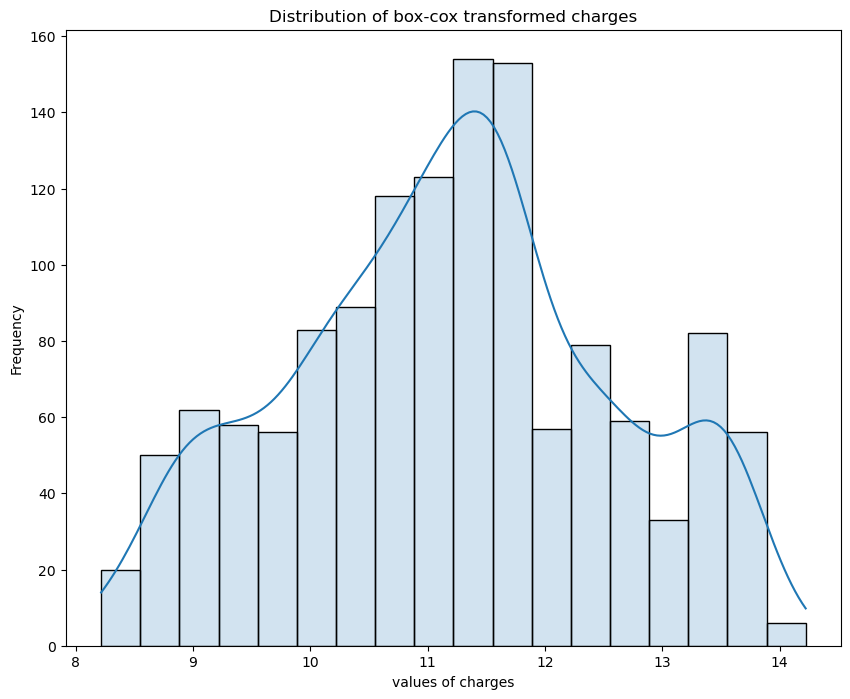

In [108]:
#plot the distribution of box-cox 
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(x='box_cox_charges', data=insurance, kde=True, ax=ax, alpha=0.2)
ax.set_xlabel('values of charges')
ax.set_ylabel('Frequency') 
ax.set_title('Distribution of box-cox transformed charges') 
plt.show()

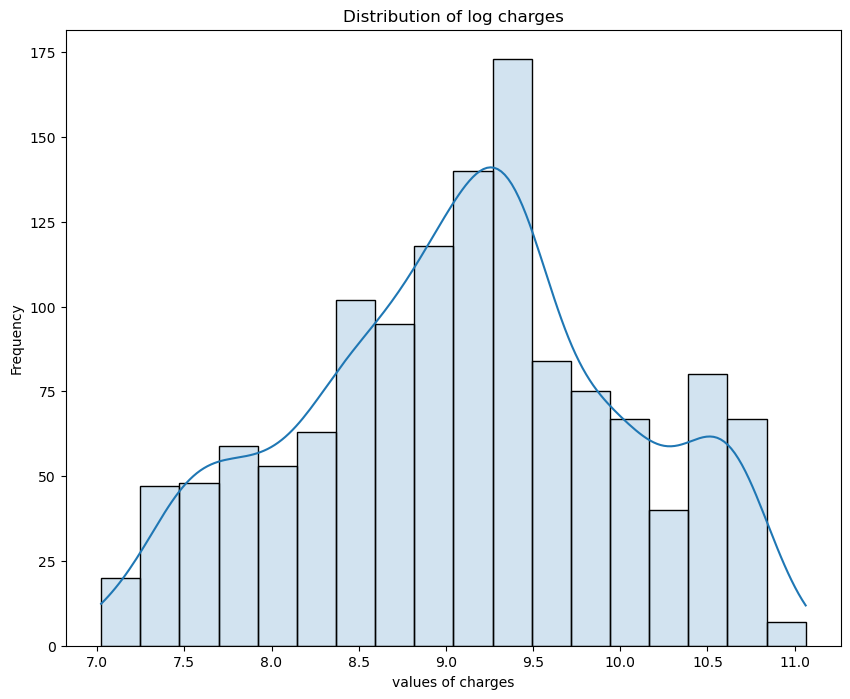

In [109]:
# plot the distribution of log transform
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(x='log_charges', data=insurance, kde=True, ax=ax, alpha=0.2)
ax.set_xlabel('values of charges')
ax.set_ylabel('Frequency') 
ax.set_title('Distribution of log charges') 
plt.show()

### Zero Centered Numeric Dependent Explanatory variables

In [111]:
con_col = ["bmi", "children", "age"]
#function for zero centering independent values
def zero_center(col):
    insurance[f'centered_{col}'] = np.subtract(insurance.loc[:,col], np.mean(insurance.loc[:,col]))
#zero centering independent values in each col
for col in con_col:
    zero_center(col)
    
insurance

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

         age_range  box_cox_charges  log_charges  centered_bmi  \
0     less than 20        12.128980     9.734176     -2.763397   
1     less than 20         8.808596     7.453302      3.106603   
2              20s        10.147521     8.400538      2.336603   
3              30s        12.534950     9.998092     -7.958397   
4              30s         9.945637     8.260197     -1.783397   
...            ...              ...          ...           ...   
1333           50s        11.424196     9.268661      0.306603   
1334  less than 20         9.150490     7.698927      1.256603   
1335  less than 20         8.729683     7.396233      6.186603   
1336           20s         9.019131     7.604867     -4.863397   
1337           60s        12.973661    10.279914     -1.593397   

      centered_children  centered_age  
0             -1.094918    -20.207025  
1             -0.094918    -21.207025  
2              1.905082    -11.207025  
3             -1.094918     -6.207025  
4             -1.094918     -7.207025  
...                 ...           ...  
1333           1.905082     10.792975  
1334          -1.094918    -21.207025  
1335          -1.094918    -21.207025  
1336          -1.094918    -18.207025  
1337          -1.094918     21.792975  

[1338 rows x 13 columns]

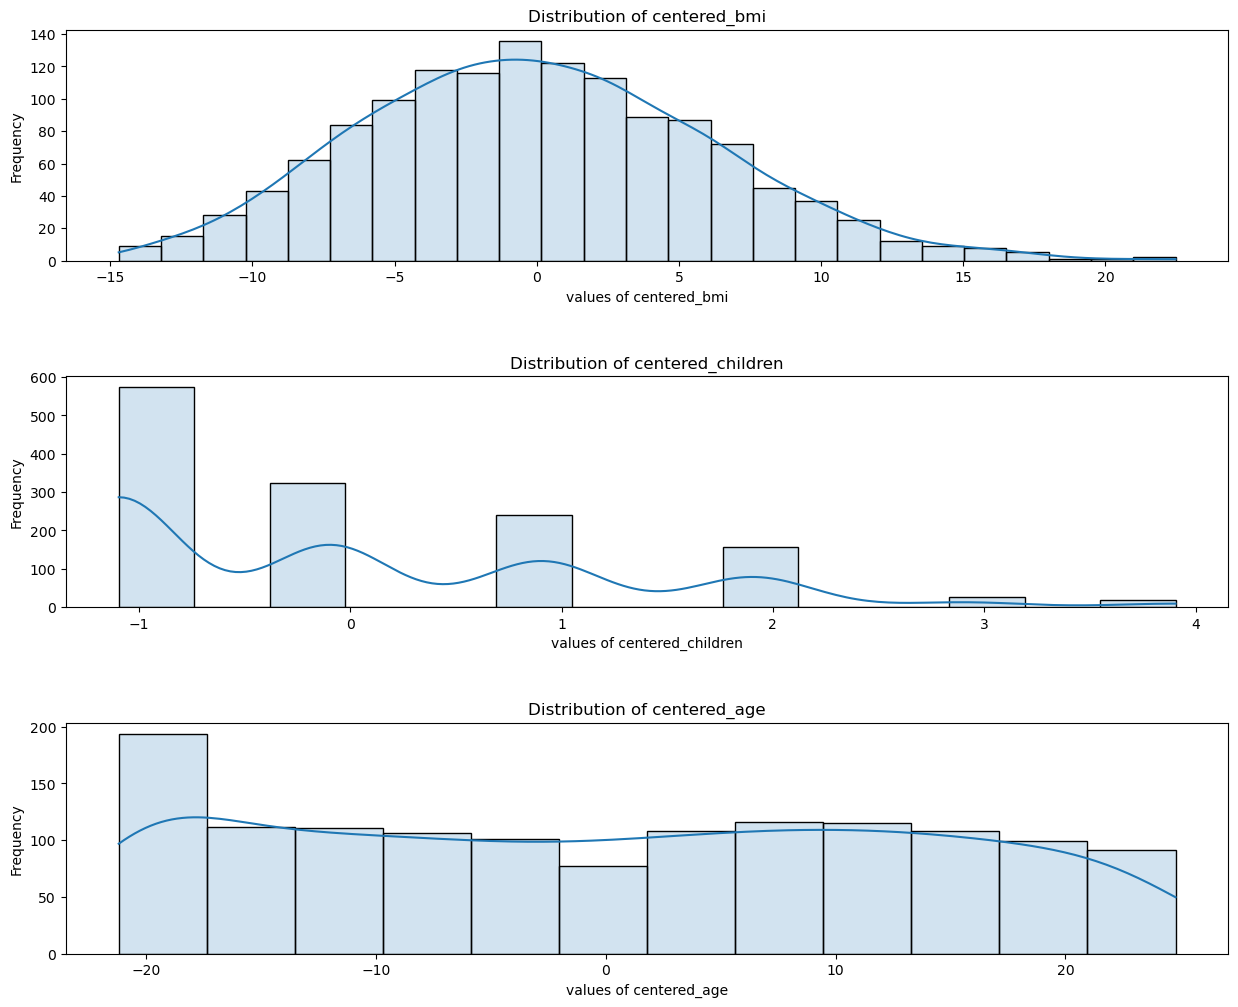

In [112]:
#produce histogram for continuous variabless
centered_col = ["centered_bmi", "centered_children", "centered_age"]

#set up the plot
fig,ax = plt.subplots(3,1,figsize=(15,12))

# Adjust spacing
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(centered_col):
    histogram_plt(insurance, col)
plt.show()

The distribution of charges is more normally distributed before the box-cox transformation. The power of box-cox transformation is 0.044, which is very close to zero and probably close to logarithmic transformation. Next, we are going to try to fit this to an ordinary least square model and look at the distribution of the residuals and if they are homoscedastic or not.

### OLS model
The assumptions of linear regression include:
1. There is a **linear relationship** between dependent variable and the **coefficients** of the independent variables. This does not mean the function approximation used must be linear.Only that the model must be linear in the coefficients. 
2. Measurement error is independent and random. Technically, we say that the error is **independent identical distributed, or iid**.
3. Errors arise from the dependent variable only. Other models, such as complete regression, must be used if there are errors in the independent variable. 
4. There is no **multicolinearity** between the features or independent variables. In other words, there is no significant correlation between the features.
5. The **residuals** are independent identically distributed (iid) Normal and **homoscedastic** (constant variance).  In other words, the errors are the same across all values of the independent variables. We will explore this fundamental property further.
#### Box-Cox Transformed

In [114]:
## Define the regresson model and fit it to the data
box_cox_formula = 'box_cox_charges ~ -1 + centered_age + C(sex) + C(smoker) + C(region) + centered_bmi + centered_children'
ols_model_boxcox = smf.ols(formula = box_cox_formula, data=insurance).fit()
print(ols_model_boxcox.summary())

                            OLS Regression Results                            
Dep. Variable:        box_cox_charges   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     559.1
Date:                Thu, 19 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:53:28   Log-Likelihood:                -1330.1
No. Observations:                1338   AIC:                             2678.
Df Residuals:                    1329   BIC:                             2725.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(sex)[female]            10

In the OLS Box-Cox transformed Regression Results, the Adj R-square is 0.770, which is considered to be quite good. The confidence interval is not wide. Most of the variables are significant according to the t-test statistics. The F-statistic probability of the model is significant, meaning the overall regression model fits the data better than the null model. Sex categories male and female increase the charge almost equally, with females slightly higher. Smokers increase the charge. Age increases the charge. Bmi increased the charge. An increase in number of children increases the charge. Category southeast and southwest decrease the charge. Category northwest is not significant. 

| Coefficient  |Significant?| Relationship to charges |
|--------------|---------|---------|
| **Female** | Significant | Increase |
| **Male** | Significant | Increase |
| **Smoker** | Significant | Increase |
| **Northwest** | Insignificant |
| **Southeast** | Significant | Decrease |
| **Southwest** | Significant | Decrease |
| **Age** | Significant | Increase |
| **BMI** | Significant | Increase |
| **Children** | Significant | Increase |

In [116]:
#function for plotting residuals distribution
def plot_resid_dist(resids):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    ## Plot a histogram
    sns.histplot(resids, bins=20, kde=True, ax=ax[0])
    ax[0].set_title('Histogram of residuals')
    ax[0].set_xlabel('Residual values')
    ## Plot the Q-Q Normal plot
    ss.probplot(resids, plot = ax[1])
    ax[1].set_title('Q-Q Normal plot of residuals')
    plt.show()

#function for plotting residual plots
def residual_plot(df, predicted='predicted', resids='resids'):
    fig,ax = plt.subplots(figsize=(12,5))
    RMSE = np.std(df.loc[:,resids])
    sns.scatterplot(x=predicted, y=resids, data=df, ax=ax)
    ax.axhline(0.0, color='red', linewidth=1.0)
    ax.axhline(2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    ax.axhline(-2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    ax.set_title('Plot of residuals vs. predicted')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    plt.show()

In [117]:
#function to calculate RMSE, MSE, MAE
def calculate_residual(name,model,transformation,data=insurance):
    data[f'predicted{name}'] = model.predict(data.loc[:, ['centered_age','sex','smoker','region','centered_bmi','centered_children']]) #add predicted columns
    data[f'{name}resids'] = np.subtract(data[f'{transformation}_charges'], data[f'predicted{name}']) #add residual columns
    predict_name = f'predicted{name}'
    resids_name = f'{name}resids'
    mean_resids = np.mean(data[f'{name}resids'])
    rmse = np.std(data[f'{name}resids'])
    mse = sklm.mean_squared_error(data[f'{transformation}_charges'], data[f'predicted{name}'])
    mae = sklm.median_absolute_error(data[f'{transformation}_charges'], data[f'predicted{name}'])
    print('Mean residuals = {0:6.3f}'.format(mean_resids))
    print('MeanSquareError  = {0:6.3f}'.format(mse))
    print('RootMeanSquareError = {0:6.3f}'.format(rmse))
    print('MeanAbsoulteError  = {0:6.3f}'.format(mae)) 
    return(predict_name, resids_name)

Mean residuals =  0.000
MeanSquareError  =  0.428
RootMeanSquareError =  0.654
MeanAbsoulteError  =  0.201


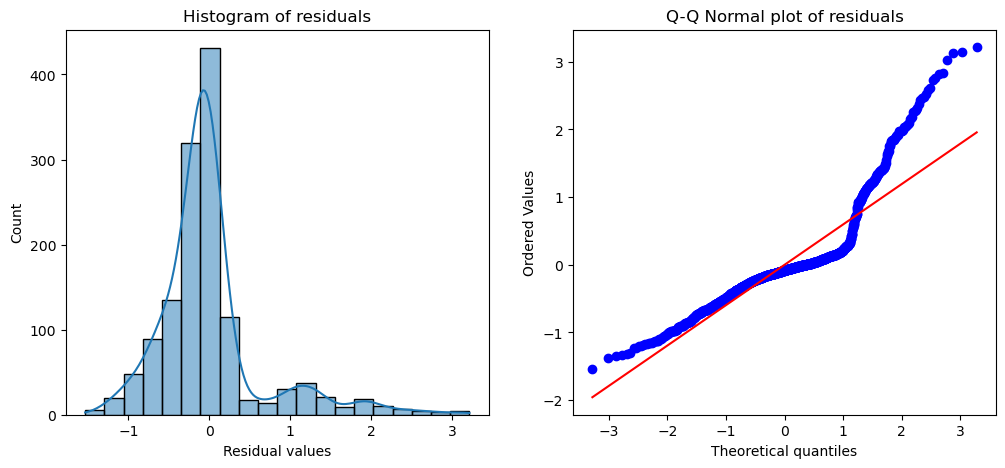

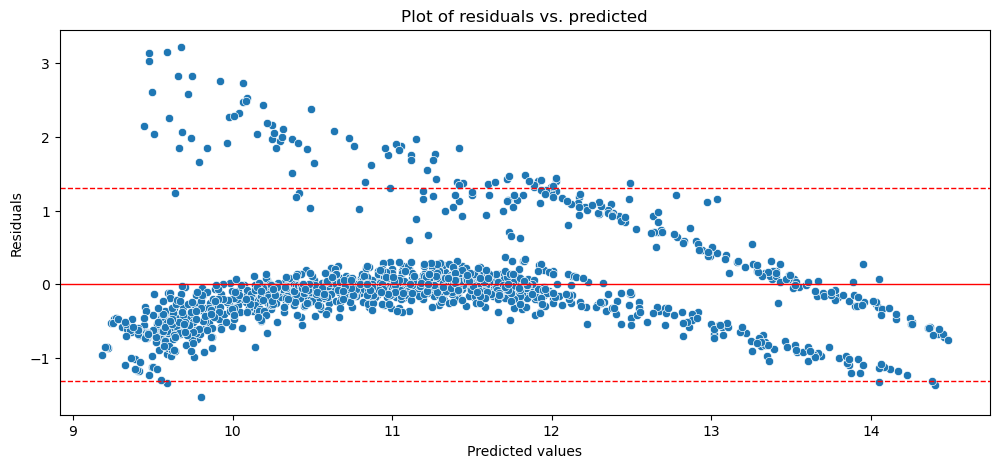

In [118]:
#Residuals calculation and plot for OLS boxcox
name = 'OLS_boxcox'
predict, resids = calculate_residual(name, ols_model_boxcox, transformation='box_cox')

plot_resid_dist(insurance['OLS_boxcoxresids'])
residual_plot(df=insurance, predicted=predict, resids=resids)

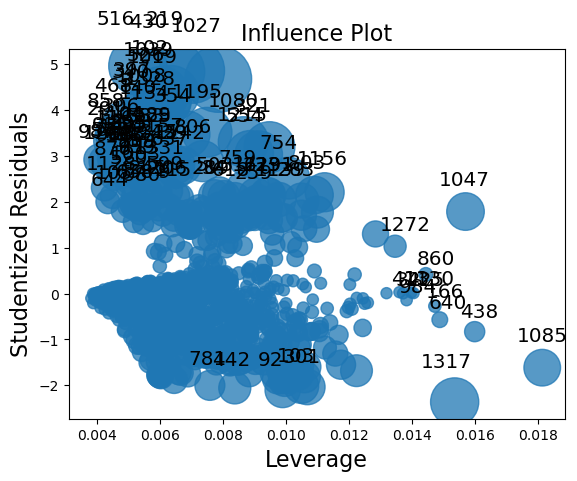

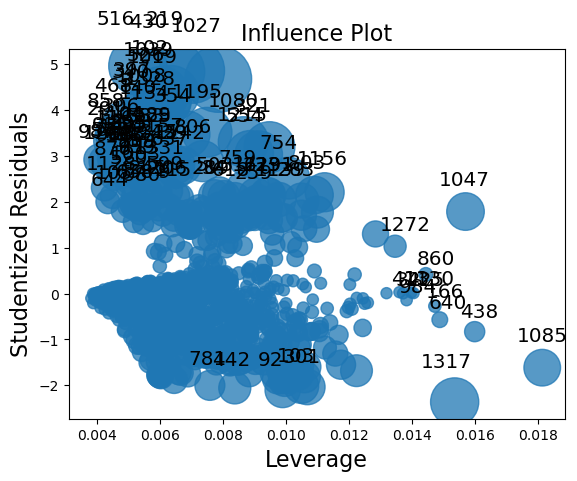

In [119]:
#influence plot for OLS boxcox
influence_plot(ols_model_boxcox)

#### Metrics in measuring Errors

* The mean of residuals (predicted - actual values) is average at 0

* The average squared difference between predicted and actual values, MSE, is 0.428. Square root of MSE, RMSE, is 0.654.

* The average absolute difference between predicted and actual values, MAE, is 0.201.

The mean of residuals at 0 is ideal for OLS, which is reasonable because we zero centered dependent values. 
The MAE of the model is quite small compared to RMSE and MSE, telling us that the average prediction error magnitude is smaller when less influenced by outliers. RMSE and MSE are larger due to penalizing larger errors and as you can see in the influence plot there are many influenced points.

#### Residual Distribution and Homoscedasticity
The histogram of the residual values is right skewed, and the QQ plot suggests non-normal residual residual. The residual is also not homoscedastic. When we look at influential plots, we see there are many high leverage points and high Cook's distance points. We can try to fit the dataset to robust regression, which reduces the impact of outliers and non-normal residuals 

#### Log Transformed

In [121]:
## Define the regresson model and fit it to the data
log_formula = 'log_charges ~ -1 + centered_age + C(sex) + C(smoker) + C(region) + centered_bmi + centered_children'
ols_model_log= smf.ols(formula = log_formula, data=insurance).fit()
print(ols_model_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Thu, 19 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:53:31   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(sex)[female]             8

In the OLS Log transformed Regression Results, the R-square and adjusted R-square are 0.768 and 0.767, slightly higher than the Box-Cox transformed model. This means the log-transformed model explained the variance of charges slightly better than the box-cox-transformed one. The F-statistic probability of the model is significant, meaning the overall regression model fits the data better than the null model.  Most of the confidence intervals are not wide and significant except for the insignificant Northwest region. Females and males increase in charge by a close amount. Smoking, increases age, BMI, and the number of children are increasing the charges. Category southeast and southwest decrease the charge. Category northwest is not significant.


| Coefficient  |Significant?| Relationship to charges |
|--------------|---------|---------|
| **Female** | Significant | Increase |
| **Male** | Significant | Increase |
| **Smoker** | Significant | Increase |
| **Northwest** | Insignificant |
| **Southeast** | Significant | Decrease |
| **Southwest** | Significant | Decrease |
| **Age** | Significant | Increase |
| **BMI** | Significant | Increase |
| **Children** | Significant | Increase |

Mean residuals =  0.000
MeanSquareError  =  0.196
RootMeanSquareError =  0.443
MeanAbsoulteError  =  0.132


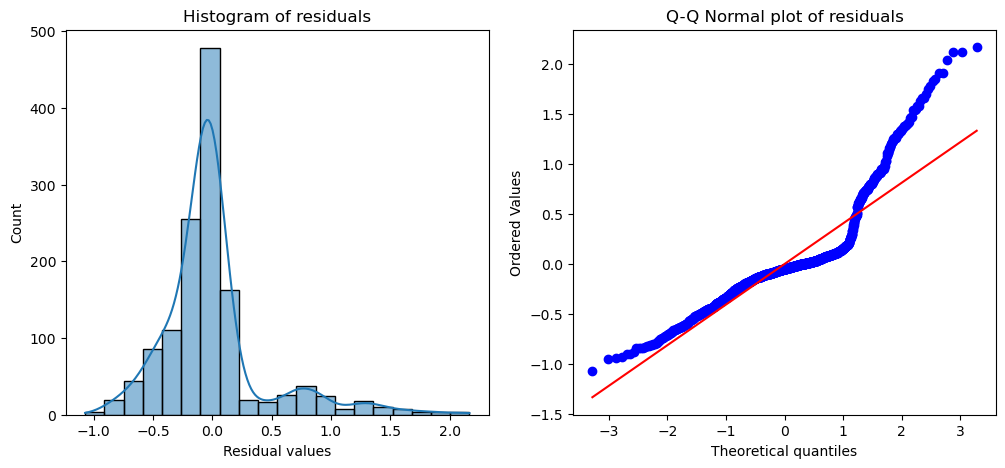

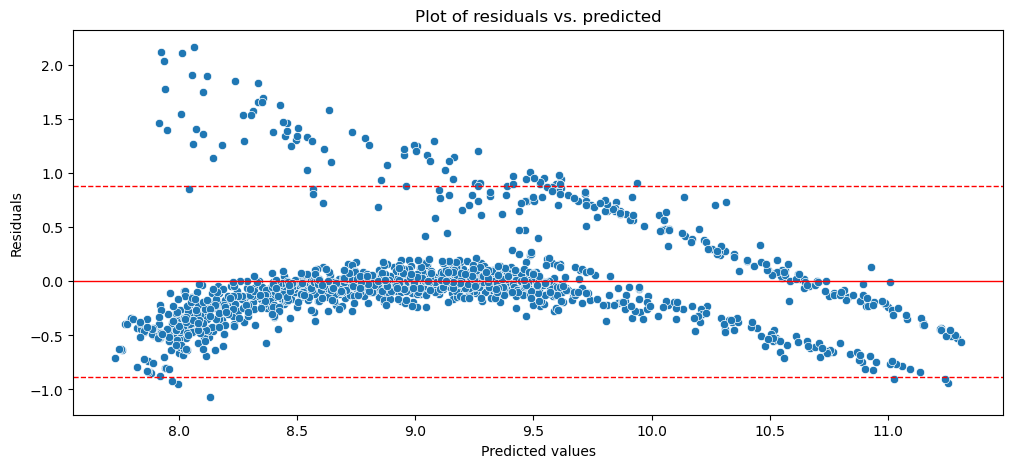

In [123]:
#Residuals calculation and plot for OLS boxcox
name = 'OLS_log'
predict, resids = calculate_residual(name, ols_model_log, transformation='log')

plot_resid_dist(insurance['OLS_logresids'])
residual_plot(df=insurance, predicted=predict, resids=resids)

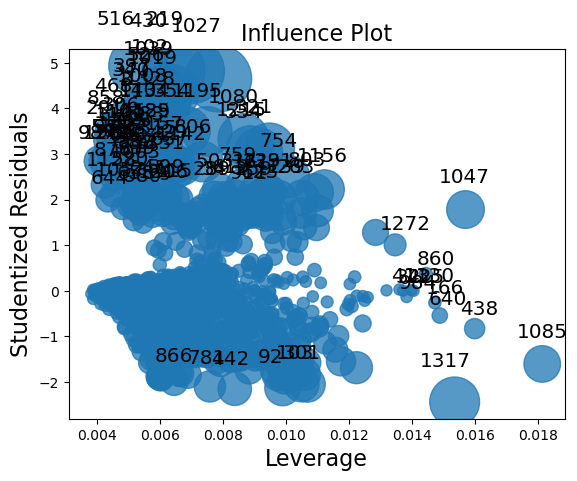

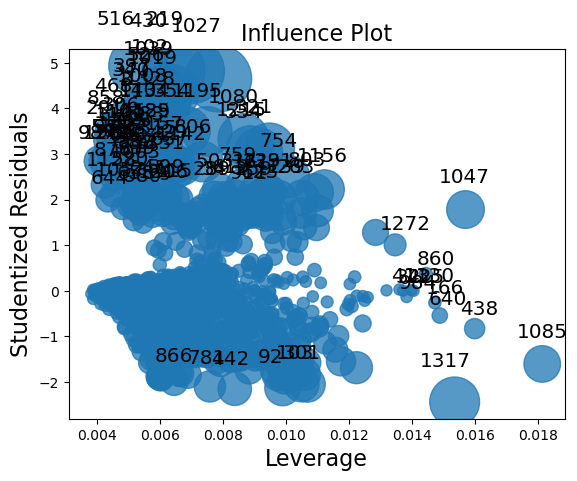

In [124]:
#influence plot for OLS log 
influence_plot(ols_model_log)

#### Metrics in measuring Errors

* The mean of residuals (predicted - actual values) is average at 0

* The average squared difference between predicted and actual values, MSE, is 0.196. Square root of MSE, RMSE, is 0.443.

* The average absolute difference between predicted and actual values, MAE, is 0.130.

The mean of residuals at 0 is ideal for OLS, which is reasonable because we zero centered dependent values. 
The MAE of the model is small showing that average errors that are less influenced by outliers are small errors. 
MSE and RMSE are smaller compared to the Box-cox transformed one, which means using a log transformation on charges makes the error less receptive to outliers.

#### Residual Distribution and Homoscedasticity
The histogram of the residual values is right-skewed, and the QQ plot suggests a non-normal residual. The residual is also not homoscedastic. When we look at influential plots, we see there are many high leverage points and high Cook's distance points. 

#### Comparison of OLS box-cox and Log transformed
| Metric              | Box-Cox | Log Transformation |Which is a Better models? |
|---------------------|---------|---------------------|----------|
|  **Adj $R^2$**           | 0.770   | 0.767             | Box-cox   |
|  **AIC and BIC**         | AIC = 2678, BIC = 2725  | AIC = 1635, BIC = 1682    | Log   |
| **Mean Residuals**      | 0.000   | 0.000               | Tie      |
| **Mean Square Error (MSE)**  | 0.428   | 0.196               | Log      |
| **Root Mean Square Error (RMSE)**| 0.654 | 0.443               | Log      |
| **Mean Absolute Error (MAE)** | 0.201   | 0.130               | Log      |

From the comparison of OLS box-cox and Log transformed table, the Box-Cox transformed model better fits the data by slightly edging out the log transformation with marginally higher R² and Adjusted R² values. Despite having a little lower R-square values, the Log transformed model performed better at a balance of model complexity and fit (AIC, BIC), minimizing large residuals and better predictive accuracy overall (RMSE, MSE, MAE). Both models do not have homoscedastic residuals according to residual histograms and QQ plots. Next, we can try to fit the dataset to robust regression, which reduces the impact of outliers and non-normal residuals 

### Robust Regression
#### Box-Cox transformed

In [127]:
robust_model = smf.rlm(formula=box_cox_formula, data=insurance).fit()
print(robust_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:        box_cox_charges   No. Observations:                 1338
Model:                            RLM   Df Residuals:                     1329
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 19 Dec 2024                                         
Time:                        14:53:33                                         
No. Iterations:                    47                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(sex)[female]            10

In the robust regression box-cox transformed model result, the relationship between independent variables and dependent variables are still similar to the OLS model. The difference that can be noticed here is all of the independent variables' p-values are significant and all the confidence intervals are narrow. Here is a table summarizing the coefficients.
| Coefficient  |Significant?| Relationship to charges |
|--------------|---------|---------|
| **Female** | Significant | Increase |
| **Male** | Significant | Increase |
| **Smoker** | Significant | Increase |
| **Northwest** | Significant | Decrease |
| **Southeast** | Significant | Decrease |
| **Southwest** | Significant | Decrease |
| **Age** | Significant | Increase |
| **BMI** | Significant | Increase |
| **Children** | Significant | Increase |

Mean residuals =  0.112
MeanSquareError  =  0.461
RootMeanSquareError =  0.670
MeanAbsoulteError  =  0.108


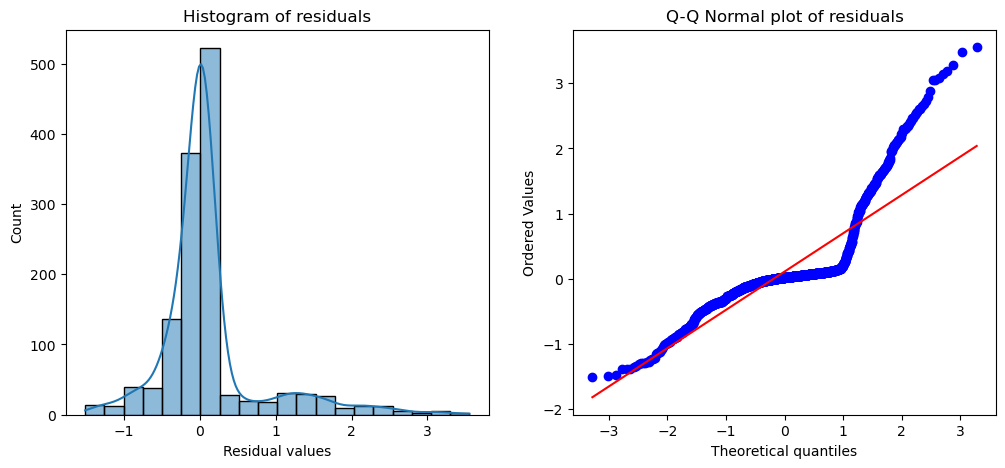

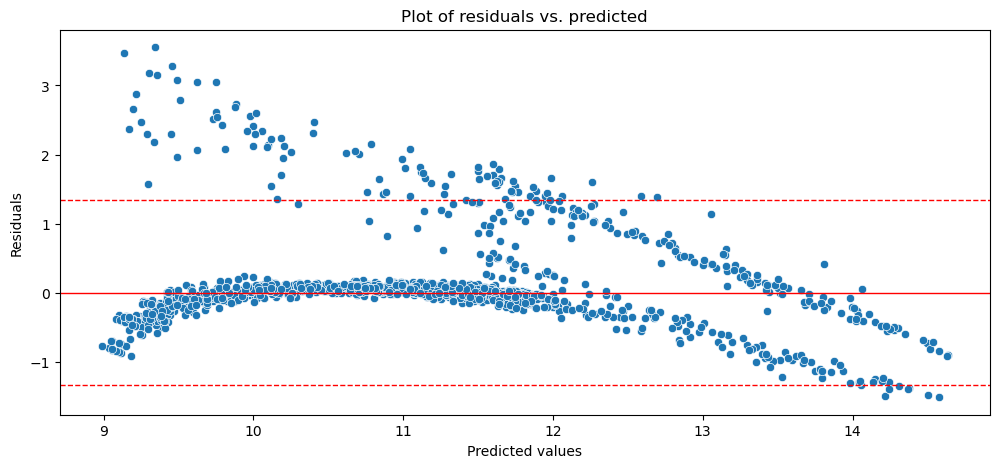

In [129]:
name = 'RLM_box_cox'
predict, resids = calculate_residual(name, robust_model, transformation='box_cox')

plot_resid_dist(insurance['RLM_box_coxresids'])
residual_plot(df=insurance, predicted=predict, resids=resids)

#### Metrics in measuring Errors

* The mean of residuals (predicted - actual values) is average at 0.112

* The average squared difference between predicted and actual values, MSE, is 0.461. The square root of MSE, RMSE, is 0.670.

* The average absolute difference between predicted and actual values, MAE, is 0.108.

The mean of residuals of the robust linear model increases from the OLS model. The MSE and RMSE values are in a similar range with the OLS Box-Cox transformed model. On the other hand, the MAE of the robust linear model decreases when compared with the OLS model. This shows that the Robust Linear model is more robust to the outliers when compared to ordinary least square regression. 

#### Residual Distribution and Homoscedasticity
The histogram of the residual values is right skewed, and the QQ plot suggests non-normal residual residual. The residual is also not homoscedastic. 

#### Log transformed

In [131]:
robust_model_log = smf.rlm(formula=log_formula, data=insurance).fit()
print(robust_model_log.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            log_charges   No. Observations:                 1338
Model:                            RLM   Df Residuals:                     1329
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 19 Dec 2024                                         
Time:                        14:53:34                                         
No. Iterations:                    50                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(sex)[female]             8

In the robust regression log-transformed model result, the relationship between independent variables and dependent variable also similar to box-cox transformed model. All the p-values of independent variables are significant and all the confidence intervals are narrow. Here is a table summarizing the coefficients.
| Coefficient  |Significant?| Relationship to charges |
|--------------|---------|---------|
| **Female** | Significant | Increase |
| **Male** | Significant | Increase |
| **Smoker** | Significant | Increase |
| **Northwest** | Significant | Decrease |
| **Southeast** | Significant | Decrease |
| **Southwest** | Significant | Decrease |
| **Age** | Significant | Increase |
| **BMI** | Significant | Increase |
| **Children** | Significant | Increase |

Mean residuals =  0.072
MeanSquareError  =  0.210
RootMeanSquareError =  0.453
MeanAbsoulteError  =  0.077


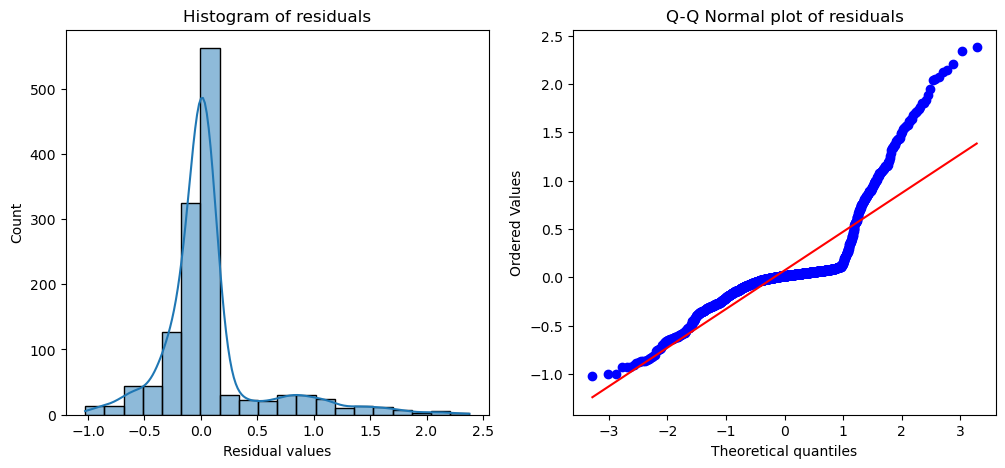

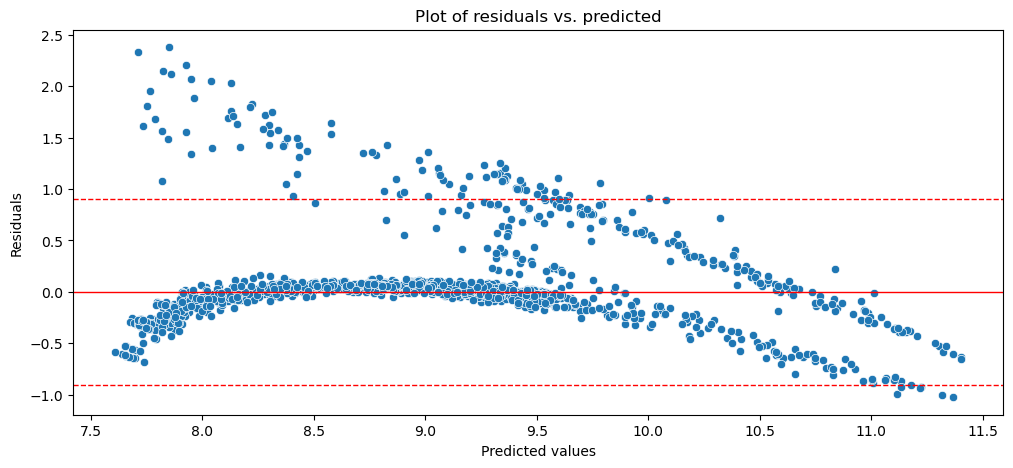

In [133]:
name = 'RLM_log'
predict, resids = calculate_residual(name, robust_model_log, transformation='log')

plot_resid_dist(insurance['RLM_logresids'])
residual_plot(df=insurance, predicted=predict, resids=resids)

#### Metrics in measuring Errors

* The mean of residuals (predicted - actual values) is average at 0.072

* The average squared difference between predicted and actual values, MSE, is 0.210. The square root of MSE, RMSE, is 0.453.

* The average absolute difference between predicted and actual values, MAE, is 0.077.

Here, the mean residuals of the log-transformed model are lower than the box-cox transformed RLM model, indicating that it is closer to having residuals centered around zero. Moreover, the log-transformed model also has lower values for MSE, RMSE, and MAE indicating that this model performs better at minimizing large residuals and lower overall prediction errors.


#### Residual Distribution and Homoscedasticity
The histogram of the residual values is right skewed, and the QQ plot suggests non-normal residual residual. The residual is also not homoscedastic. 


#### Comparison of RLM box-cox and Log transformed
| Metric              | Box-Cox | Log Transformation |Which is a Better models? |
|---------------------|---------|---------------------|----------|
| $P>|z|$ |   significant      |    significant    |    **Tie**  |
| **Mean Residuals**      | 0.112            | 0.072            | **Log**          |
| **Mean Square Error (MSE)** | 0.461           | 0.210            | **Log**          |
| **Root Mean Square Error (RMSE)** | 0.670     | 0.453            | **Log**          |
| **Mean Absolute Error (MAE)**  | 0.108       | 0.077            | **Log**          |


From the comparison of RLM box-cox and Log transformed table, both models are significantly performing better than the null model. Once again, the Log-transformed model has out-compete box-cox model in residuals analysis. The log-transformed model shows the result of lower mean residuals, mean square error, root mean square error, and mean absolute error. Despite the Log-transformed model performing better at residual metrics, both models do not have homoscedastic residuals according to residual histograms and QQ plots. Next, we will try the Gamma Generalize linear model in hopes that it can fit the highly skewedness of a data set better. 

### Gamma Generalize Linear Model

#### Assumption
Gamma Generalized Linear Model comes with its own key assumptions that consist of the dependent variable must be positive and continuous, it should follow Gamma distribution of positively skewed long tail to the right, the variance of the response variable is proportional to the square of the mean, $$ Variance = \phi x (Mean)^{2} $$ observations should be independent of each other, predictors must not be perfectly correlated.

#### Deviance
Rather than measuring the error in $R^2$, GLM measures the error in deviance. Deviance is the difference between the log-likelihood of a reference model and some other model. The significance of the test on a model can be measured by Pearson chi2 because the deviance statistic is $\chi^2$ distributed. 

#### Log transformed through log-link function

In [136]:
#fit data and formular into gamma glm
untransformed_formula = 'charges ~ -1 + centered_age + C(sex) + C(smoker) + C(region) + centered_bmi + centered_children'
gamma_glm = smf.glm(formula=untransformed_formula, data=insurance, family=sm.families.Gamma(sm.families.links.Log())).fit()
print(gamma_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 1338
Model:                            GLM   Df Residuals:                     1329
Model Family:                   Gamma   Df Model:                            8
Link Function:                    Log   Scale:                         0.46695
Method:                          IRLS   Log-Likelihood:                -13307.
Date:                Thu, 19 Dec 2024   Deviance:                       337.73
Time:                        14:53:35   Pearson chi2:                     621.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6833
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(sex)[female]             9

In [137]:
from scipy.stats import chi2
#function to compute glm error metrics
def glm_error(model):
    # Compute the difference in deviance
    deviance_diff = model.null_deviance - model.deviance
    
    # Degrees of freedom (difference in the number of parameters between the two models)
    df_diff = model.df_model
    
    # Compute the p-value
    p_value = chi2.sf(deviance_diff, df_diff)

    print("Deviance Difference:", deviance_diff)
    print("Degrees of Freedom Difference:", df_diff)
    print("Deviance Difference p-value:", p_value)

glm_error(gamma_glm)

Deviance Difference: 718.3145308930683
Degrees of Freedom Difference: 8
Deviance Difference p-value: 8.152988583442936e-150


This log-transformed gamma glm model applied the log link function, which ensures the predictions are positive and models the relationship between predictors and the logarithm of the target variable.
The dispersion parameter $\phi$ is 0.46 for the variability of the data. The smaller value tells us that the model is a better fit. Deviance is at 337.73, lower deviance than the null deviance indicates the model is fitting the data well. 
The Deviance Difference p-value is 8.1529e-150, which tells us that the model significantly improves over the null model.

For the interpretation of the coefficient, both females and males have a significant effect on charges with females slightly higher than male charges. Smokers are expected to get higher charges than non-smokers. For every year increase in age, charges increase. For every BMI increase, the charge increases. Additional children will increase the charge. For the region, the Southeast and southwest have a negative correlation. The northwest region is not significant from the northeast.

| Coefficient  |Significant?| Relationship to charges |
|--------------|---------|---------|
| **Female** | Significant | Increase |
| **Male** | Significant | Increase |
| **Smoker** | Significant | Increase |
| **Northwest** | Insignificant | |
| **Southeast** | Significant | Decrease |
| **Southwest** | Significant | Decrease |
| **Age** | Significant | Increase |
| **BMI** | Significant | Increase |
| **Children** | Significant | Increase |


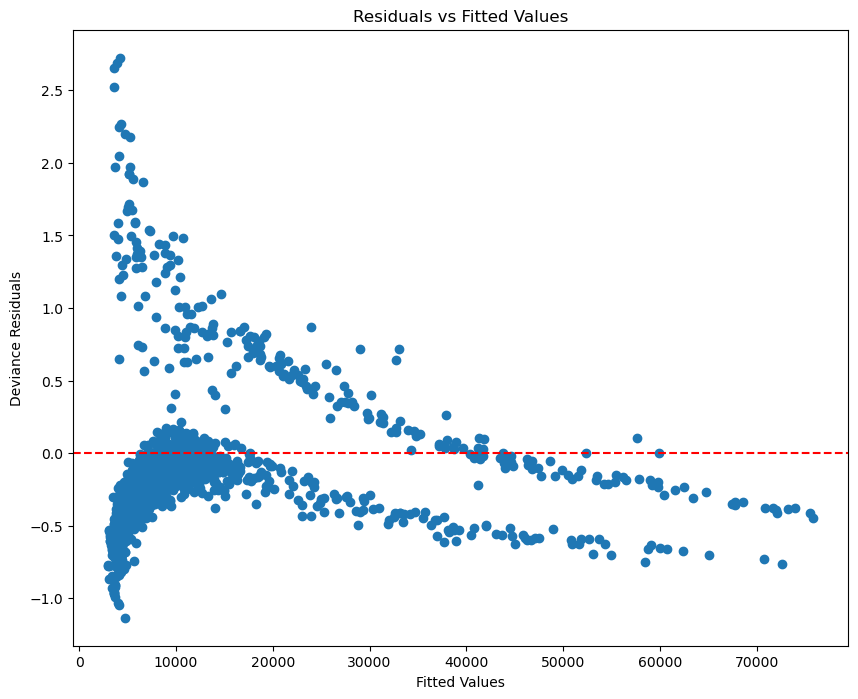

In [139]:
#function for plot for Deviance residuals vs fitted values
def res_vs_fit_plot(model):
    residuals = model.resid_deviance
    fitted = model.fittedvalues
    
    fig,ax = plt.subplots(figsize=(10,8))
    
    plt.scatter(fitted, residuals)
    plt.axhline(0, linestyle='--', color='red')
    plt.xlabel('Fitted Values')
    plt.ylabel('Deviance Residuals')
    plt.title('Residuals vs Fitted Values')

res_vs_fit_plot(gamma_glm)
plt.show()

From the residuals vs fitted values, at lower fitted values we see that there is a wide spread of residuals from 2.5 to -1. At the higher fitted values, the spread of residuals decreases. The variance decreases as fitted values increase, which suggests heteroscedasticity. This might tell us that the model is not good at predicting for smaller charges, but is good with larger charges. What we can try next is to improve by transforming predictors or testing alternative link functions.

#### Box-Cox Transformed

In [142]:
#suppress warning using identity links
import warnings
warnings.filterwarnings("ignore")

#fit data and formular into gamma glm
box_cox_gamma_glm = smf.glm(formula=box_cox_formula, data=insurance, family=sm.families.Gamma(sm.families.links.identity())).fit()
print(box_cox_gamma_glm.summary())

#error metrics
glm_error(box_cox_gamma_glm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:        box_cox_charges   No. Observations:                 1338
Model:                            GLM   Df Residuals:                     1329
Model Family:                   Gamma   Df Model:                            8
Link Function:               identity   Scale:                       0.0037842
Method:                          IRLS   Log-Likelihood:                -1335.3
Date:                Thu, 19 Dec 2024   Deviance:                       4.6484
Time:                        14:53:35   Pearson chi2:                     5.03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.9545
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(sex)[female]            10

The dispersion parameter $\phi$ is 0.0038 for the variability of the data. Deviance is at 4.6. Both the dispersion parameter and variability of this model are lower than a log-transformed glm model, suggesting the potential that box Cox transformed is a better model fit for data. The Deviance Difference p-value is 0.048, which tells us that the model significantly improves over the null model.

The relationships of coefficients to independent variable charge are similar to the log-transformed model. Both females and males have almost equal effects to charge with females slightly higher than male charges. Being a smoker, increasing age, increasing BMI, increase children increase charges. For the region, the Southeast and southwest have a negative correlation. The northwest region is not significant from the northeast.

| Coefficient  |Significant?| Relationship to charges |
|--------------|---------|---------|
| **Female** | Significant | Increase |
| **Male** | Significant | Increase |
| **Smoker** | Significant | Increase |
| **Northwest** | Insignificant |  |
| **Southeast** | Significant | Decrease |
| **Southwest** | Significant | Decrease |
| **Age** | Significant | Increase |
| **BMI** | Significant | Increase |
| **Children** | Significant | Increase |

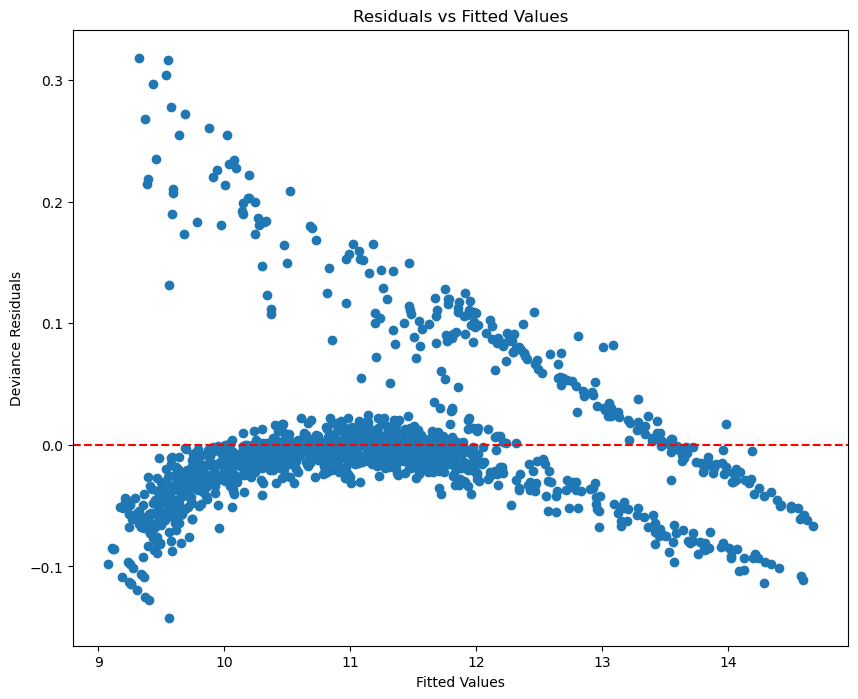

In [144]:
res_vs_fit_plot(box_cox_gamma_glm)
plt.show()

The residuals vs fitted values of box-cox transformed are similar in trend to log-transformed because at lower fitted values we see a wide spread of residuals from -0.1 to 0.3. At the higher fitted values, the spread of residuals decreases. This indicates heteroscedasticity, where the variance of the residuals is not constant across the range of fitted values. What is the difference between log and boxcox-transformed residuals vs fitted plot is box cox transformed shows a clearer pattern of a curved, non-random structure, particularly U-shaped or parabolic, and a straight negative slope. Also, box cox-transformed residuals are also less widespread at the low fitted values, showing improvement.  


#### Comparison of Gamma GLM box-cox and Log transformed
| Metric              | Box-Cox | Log Transformation |Which is a Better models? |
|---------------------|---------|---------------------|----------|
|**Dispersion parameter**| 0.0038 | 0.46 | Box-Cox  |
|**Log-Likelihood**| -1335.3 | -13307. | Box-Cox  |
|**Deviance** | 4.6484 | 337.73 | Box-Cox  |
|**Pearson Chi-Square**| 5.03 | 621. | Box-Cox  |
|**Deviance Difference**| 15.64 | 718.31 | Log |
|**Deviance Difference p-value**| 0.047 | 8.15e-150 | Log|

From the comparison of gamma glm box-cox and log transformed table, we can observe that the Box-Cox model generally performs better in terms of model fit, precision, and variance structure, as indicated by the lower dispersion parameter, deviance, Pearson chi-square, and higher log-likelihood. The Log-transformed model shows stronger improvement over the null model (higher deviance difference) and stronger statistical significance (smaller p-value). However, the very large deviance and Pearson chi-square suggest potential issues with fit or residual structure.


### Tweedie distribution GLM

Tweedie distribution is one of the exponential families that includes continuous normal, gamma, Poisson, and inverse Gaussian distribution. In our insurance dataset, which has a characteristic of positively skewed distribution, we are interested in exploring a compound of poisson-gamma structure of Tweedie distribution that is defined by the Tweedie power parameter (p) where it is Poisson distribution if p is 1, gamma distribution of p is 2, and Tweedie distribution if p is between 1 and 2. 

#### Assumption
Tweedie distribution can be applied to a wide range of distributions due to its mean-variance relationship that states that the variance is proportional to the power of the mean. This makes it very flexible to work with various distribution types. 

$ {Var}(Y) = \phi \cdot \mu^p $ 

* $\mu$ = Mean of the response variable.
* $\phi$ = Dispersion parameter (scale).
* $p$ = Power parameter where 0$\leq$ p $\leq$ 3


#### Deviance
GLM measures the error in deviance. Deviance is the difference between the log likelihood of a reference model and some other model. The significance of the test on a model can be measure by Pearson chi2 because deviance statistic is $\chi^2$ distributed. 

#### Grid Search for Optimal Tweedie Power for Log and Box-Cox Transformed

In [147]:
#finding the best power parameter selection by grid search
def optimal_power(formula_twd):
    #grid for powers
    powers = np.arange(1,2,0.1)
    print(powers)
    results = []

    #if formular is untransform, apply log link. if box-cox, use identity link
    if formula_twd == untransformed_formula:
        function = sm.families.links.log()
    else:
        function = sm.families.links.identity()
    
    #fit to model
    for p in powers:
        model = smf.glm(
            formula=formula_twd,
            data=insurance,
            family=sm.families.Tweedie(var_power=p, link=function )
        ).fit()
        results.append((p, model.aic))
    
    # Find the best power
    best_power = min(results, key=lambda x: x[1])
    print("Best power:", best_power[0])
    print("Best AIC:", best_power[1])
    return(best_power[0])

In [148]:
#optimal power for log transformed
log_power = optimal_power(untransformed_formula)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
Best power: 1.0
Best AIC: 1079.1834129912727


In [149]:
#optimal power for box cox transformed
box_cox_power = optimal_power(box_cox_formula)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
Best power: 1.1
Best AIC: -inf


#### Log transformed

In [151]:
# Fit a Tweedie GLM
tweedie_log_glm = smf.glm(
    formula=untransformed_formula,
    data=insurance,
    family=sm.families.Tweedie(var_power=log_power, link=sm.families.links.log())  # Specify Tweedie with log-link
).fit()

# Print the summary
print(tweedie_log_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 1338
Model:                            GLM   Df Residuals:                     1329
Model Family:                 Tweedie   Df Model:                            8
Link Function:                    log   Scale:                          3074.2
Method:                          IRLS   Log-Likelihood:                -530.59
Date:                Thu, 19 Dec 2024   Deviance:                   3.2477e+06
Time:                        14:53:36   Pearson chi2:                 4.09e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.8964
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(sex)[female]             9

In [152]:
glm_error(tweedie_log_glm)

Deviance Difference: 9327362.793566171
Degrees of Freedom Difference: 8
Deviance Difference p-value: 0.0


This log-transformed Tweedie glm model applied the log link function, which ensures the predictions are positive and models the relationship between predictors and the logarithm of the target variable. The dispersion parameter $\phi$ is 3074.2 for the variability of the data. Deviance is at 3.247e+06. Both the dispersion parameter and variability of this model are quite high, which might not be the best model fit for the dataset. The Deviance Difference p-value is 0.0, which tells us that the model significantly improves over the null model.

For the interpretation of the coefficient, Both females and males have almost equal effects on charge with females slightly higher than male charges. Being a smoker, increasing age, increasing BMI, increase children does increase charges. Region Northwest and Southwest are not significant, and Southeast is the only significant and has a negative correlation with charges.


| Coefficient  |Significant?| Relationship to charges |
|--------------|---------|---------|
| **Female** | Significant | Increase |
| **Male** | Significant | Increase |
| **Smoker** | Significant | Increase |
| **Northwest** | Insignificant |  |
| **Southeast** | Significant | Decrease |
| **Southwest** | Insignificant |  |
| **Age** | Significant | Increase |
| **BMI** | Significant | Increase |
| **Children** | Significant | Increase |

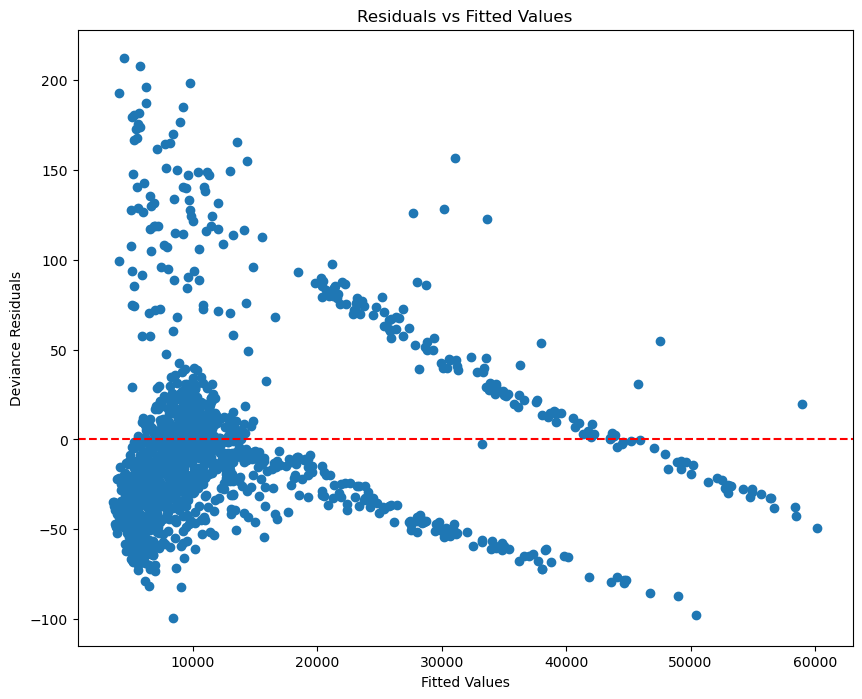

In [154]:
res_vs_fit_plot(tweedie_log_glm)

From the residuals vs fitted values, at lower fitted values we see that there are very wide spread of residuals from -100 to 200. At the higher fitted values, the spread of residuals decreases. The variance decreases as fitted values increase, which suggests heteroscedasticity. This might tell us that the model is not good at predicting for smaller charges, but is good with larger charges. 

#### Box-cox transformed


In [157]:
# Fit a Tweedie GLM
tweedie_boxcox_glm = smf.glm(
    formula=box_cox_formula,
    data=insurance,
    family=sm.families.Tweedie(var_power=box_cox_power, link=sm.families.links.identity())  
).fit()

# Print the summary
print(tweedie_boxcox_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        box_cox_charges   No. Observations:                 1338
Model:                            GLM   Df Residuals:                     1329
Model Family:                 Tweedie   Df Model:                            8
Link Function:               identity   Scale:                        0.031654
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Thu, 19 Dec 2024   Deviance:                       40.375
Time:                        14:53:37   Pearson chi2:                     42.1
No. Iterations:                     9   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(sex)[female]            10

In [158]:
glm_error(tweedie_boxcox_glm)

Deviance Difference: 136.03931439064814
Degrees of Freedom Difference: 8
Deviance Difference p-value: 1.579361031405023e-25


Box-cox-transformed Tweedie glm model has a dispersion parameter $\phi$ is 0.032 for the variability of the data. Deviance is at 40.375. 
This model is a better fit than the log-transformed Tweedie glm model because both the dispersion parameter and variability of this model are lower.
The Deviance Difference p-value is 1.58e-25, which tells us that the model significantly improves over the null model.

For the interpretation of the coefficient, Both females and males have almost equal effects on charge with females slightly higher than male charges. Being a smoker, increasing age, increasing BMI, increase children does increase charges. Region Northwest is not significant. Region southeast and southwest decrease the charges. 

| Coefficient  |Significant?| Relationship to charges |
|--------------|---------|---------|
| **Female** | Significant | Increase |
| **Male** | Significant | Increase |
| **Smoker** | Significant | Increase |
| **Northwest** | Insignificant |  |
| **Southeast** | Significant | Decrease |
| **Southwest** | Significant | Decrease |
| **Age** | Significant | Increase |
| **BMI** | Significant | Increase |
| **Children** | Significant | Increase |

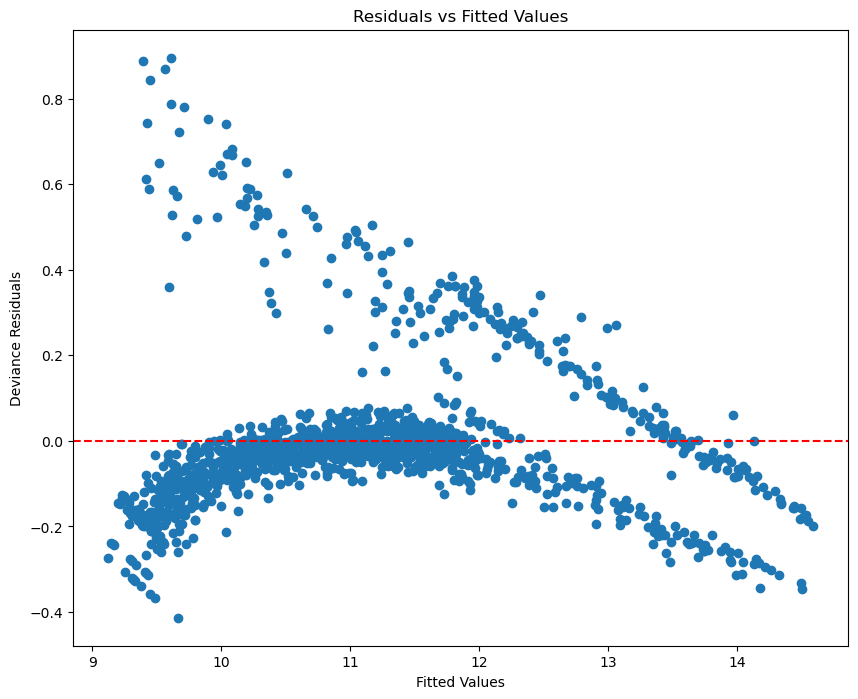

In [160]:
res_vs_fit_plot(tweedie_boxcox_glm)

The residuals vs fitted values of box-cox transformed are similar in trend to log-transformed because at lower fitted values we see a wide spread of residuals from -0.4 to 0.8. At the higher fitted values, the spread of residuals decreases. This indicates heteroscedasticity, where the variance of the residuals is not constant across the range of fitted values. What is the difference between log and boxcox-transformed residuals vs fitted plot is box-cox transformed shows a clearer pattern of a curved, non-random structure, particularly U-shaped or parabolic, and a straight negative slope. Also, box cox-transformed residuals are less widespread at the low fitted values, showing improvement. 

#### Comparison of Tweedie GLM box-cox and Log transformed
| Metric              | Log | Box-Cox |Which is a Better models? |
|---------------------|---------|---------------------|----------|
|**Log-Likelihood**| -530.59 | inf | Log  |
|**Deviance** | 3.2477e+06 | 40.375 | Box-Cox  |
|**Pearson Chi-Square**| 4.09e+06 | 42.1 | Box-Cox |
|**Deviance Difference**| 9327362.79 | 136.04 | Box-Cox  |
|**Deviance Difference p-value**| 0.0 | 1.58e-25 | Log  |

From the comparison of Tweedie GLM box-cox and Log transformed table, the box-cox model produces an invalid likelihood but has lower deviance, Pearson chi-square, and deviance difference p-value than a log-transformed model. Even though the log-transformed model's likelihood is valid and the p-value extremely small, it cannot compete with box-cox transformed in terms of fit (deviance) and variance structure (Pearson chi-square). Both transformed models still suffer from heteroscedasticity of the residuals as we have tried many models to account for the highly skewed shape of insurance charges. What we can do next is briefly look at the formula to account for more interaction terms between smoking and other coefficients to see if the model is capturing all the relationships happening in insurance charges. 

#### Including interaction term of smoking category with other dependent variables

In [163]:
boxcox_formula_interaction = 'box_cox_charges ~ -1 + C(sex) + C(smoker) + bmi + centered_age + centered_children + C(region) \
+ C(smoker):bmi + C(smoker):centered_age + C(smoker):centered_children + C(region):C(smoker)'

In [164]:
box_cox_power_interaction = optimal_power(boxcox_formula_interaction)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
Best power: 1.1
Best AIC: -inf


In [165]:
# Fit a Tweedie GLM
tweedie_boxcox_glm_interaction = smf.glm(
    formula=boxcox_formula_interaction,
    data=insurance,
    family=sm.families.Tweedie(var_power=1.1, link=sm.families.links.identity())  
).fit()

# Print the summary
print(tweedie_boxcox_glm_interaction.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        box_cox_charges   No. Observations:                 1338
Model:                            GLM   Df Residuals:                     1323
Model Family:                 Tweedie   Df Model:                           14
Link Function:               identity   Scale:                        0.024793
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Thu, 19 Dec 2024   Deviance:                       30.854
Time:                        14:53:37   Pearson chi2:                     32.8
No. Iterations:                     8   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [166]:
glm_error(tweedie_boxcox_glm_interaction)

Deviance Difference: 145.56074679098037
Degrees of Freedom Difference: 14
Deviance Difference p-value: 5.5390881458791724e-24


Box-cox-transformed Tweedie glm model including smoking interaction has a dispersion parameter $\phi$ is 0.025 for the variability of the data. Deviance is at 30.854. This model is a better fit than the Tweedie glm model that does not include smoking interaction terms because both the dispersion parameter and variability of this model are lower. The Deviance Difference p-value is 5.54 e-24, which tells us that the model significantly improves over the null model.

The interaction term of smoking with BMI provides us with an insight that for smokers, an increase in BMI strongly increases charges. On the other hand, smokers with more children see less increase in charges. The total effect of number of children on charges for smokers is calculated as Effect for smokers = $\beta_{children} (0.1924)$ + $\beta_{smoker:age}(-0.1764)$ = 0.016.  For nonsmokers, age has an increased effect on charges significantly, but the increased age effect has a lesser positive impact on smokers. The total effect of age on charges for smokers is calculated as Effect for smokers = $\beta_{centeredage} (0.0609)$ + $\beta_{smoker:age}(-0.0468)$ = 0.0141. This makes sense because smokers have been highly charged since they were younger and the increase in charges slows down when they are older. Non-smokers in southeast and southwest regions see significant reductions in charges, while smokers in the southwest experience a compensating positive interaction effect, increasing charges.


| Coefficient  |Significant?| Relationship to charges |
|--------------|---------|---------|
| **Female** | Significant | Increase |
| **Male** | Significant | Increase |
| **Smoker** | Insignificant |  |
| **Northwest** | Significant | Decrease  |
| **Southeast** | Significant | Decrease |
| **Southwest** | Significant | Decrease |
| **Northwest:smoker** | Insignificant |   |
| **Southeast:smoker** | Insignificant |  |
| **Southwest:smoker** | Significant | Increase |
| **BMI** | Insignificant |  |
| **BMI:smoker** | Significant | Increase |
| **Age** | Significant | Increase |
| **Age:smoker** | Significant | Decrease |
| **Children** | Significant | Increase |
| **Children:smoker** | Significant | Decrease |


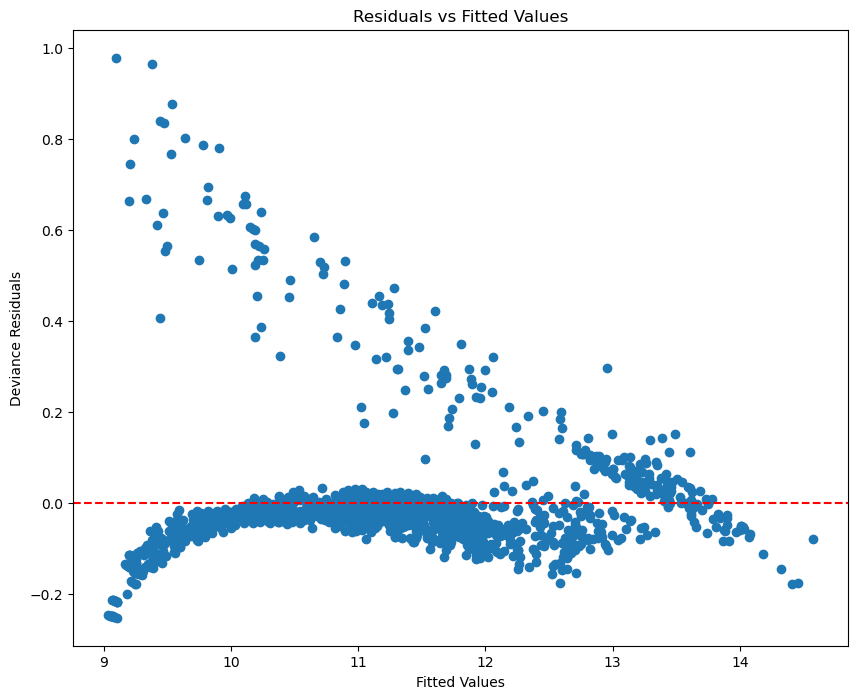

In [168]:
res_vs_fit_plot(tweedie_boxcox_glm_interaction)

The residuals vs fitted values plot of box-cox transformed with smoking interaction terms still shows heteroscedasticity, but it also shows improvement from what used to be a parabolic curve near zero to be more linear with a zero line. The straight negative slope is still prominent and can be investigated further in the future for any missing interactions that this model does not address. 

### <u>Conclusion</u>
This report has analyzed the influence of age, sex, BMI, smoking status, number of children, and region on insurance charges. The statistical models used include Ordinary Least Squares (OLS), Robust Regression, Gamma Generalized Linear Models (GLMs), and Tweedie GLMs and the transformation on insurance charges are Box-cox and log transformations. 

##### Effects of dependent variables on charges
**Smoking** \
Smoking is the most significant predictor of increased insurance charges across all models. Smokers consistently incurred substantially higher charges than non-smokers, with the interaction effects of smoking with BMI, age, and children revealing nuanced relationships. Smoking significantly magnifies the charges with higher BMI. Even though smokers experience a lower rate of increase charges when they are older compared to non-smokers, smokers are still experiencing a net increase in charges as they age. The same effect can be observed in the relationship of smokers to many children. As the number of children increases for smokers, there is a lower magnitude of increased charge. This may be due to usually older people have more children, or there is not much data for the group that has many children. 

**Age and BMI** \
An increase in age and BMI increased insurance charges. Age and BMI are consistently significant in every model and maintain positive relationships. Based on the facet grid plots of age range category, BMI, and charges, the baseline charges for nonsmokers are lowest for people who are in the age group of less than 20. Then the baseline charges increase every decade until the maximum baseline charges in the age range of 50s. There are not a lot of observations in people in the group of 60s, therefore it is harder to make an inference. 

**Number of children and Region** \
A number of children have a positive relationship with insurance charges, and this factor also is significant across all models. The region had mixed effects for their significant impact on charges in models. Southeast and Southwest residents showed reduced charges compared to the baseline Northeast, while Northwest differences were often insignificant.

**Sex** \
The coefficients for females and males consistently show that females have slightly higher baseline charges than males across most models.
While the difference between male and female charges is statistically significant, the magnitude of the difference is relatively small.
This difference may reflect differences in health-related costs or behaviors between genders. For example, women will be charged for hospital stays for giving birth process and that is a charge that insurance does not expect for typical men. Females generally incur slightly higher baseline charges than males, but this difference does not vary significantly across other predictors like age, BMI, or smoking status.

##### Practical usage of the insight 
In this analysis, we have shown how a personal lifestyle can greatly affect your insurance charges. Smoking and weight are two important factors that individuals can have control over. By quitting smoking and maintaining BMI in a healthy range, the insurance charges can be reduced greatly. Females may receive slightly higher charges than males, but this difference is not a factor that greatly increases charges. Region of residence in the United States also does not show a consistently significant impact for greatly reducing charges. 

##### Models discussion and and future work
The residuals of most models indicated heteroscedasticity, especially at lower predicted values, suggesting the need to explore for more relationships between the dependent variables as well as other hidden variables that are not included such as income or pre-existing conditions. Overall, the Box-Cox Gamma GLM provided the most reliable results for understanding the relationship between health insurance charges and key predictors. The Box-Cox Tweedie GLM with smoking interaction term shows some improvement of residual heteroscedasticity in the residual vs fitted plot and also explains more of what the effect of smoking has when interacting with other factors. If possible for future work, the model should use stepwise regression to help with finding the best formula as well as trying Bayesian methods to fit the data. 

### Reference

https://www.kff.org/health-policy-101-health-care-costs-and-affordability/?entry=table-of-contents-how-has-u-s-health-care-spending-changed-over-time \
https://www.ama-assn.org/about/research/trends-health-care-spending \
https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html \
https://cran.r-project.org/web/packages/GlmSimulatoR/vignettes/tweedie_distribution.html \
https://civil.colorado.edu/~balajir/CVEN6833/lectures/c-czado-GLM-lectures/GammaGLM-01.pdf